<h1> Проект по Uplift-моделированию </h1>

<h2>Введение</h2>

Перед вами типичная задача, возникающая при работе с моделями кампейнинга в банке: заказчик запустил несколько пилотов по взаимодействию с клиентами с помощью разных каналов: push в мобильном приложении, sms, баннеры в мобильном приложении и реклама в других приложениях экосистемы. Заказчик хотел бы понимать, какой канал взаимодействия с клиентом наиболее эффективен для каждого клиента из клиентской базы. Кампании планируются и запускаются в ежемесячном режиме. Иными словами, заказчик хотел бы в идеале ежемесячно получать список клиентов, которым необходимо отправить коммуникацию с указанием канала и прироста вероятности покупки в случае, если клиенту отправят коммуникацию по сравнению с тем случаем, когда клиенту коммуникацию не отправят.

<b>Таким образом: </b>
1.	У нас есть база клиентов (клиенты, имеющие id в банке). По данной базе осуществляется рассылка тех или иных стимулирующих коммуникаций по различным продуктам, каналам (например SMS, Push, баннеры в мобильном приложении и т.д.) и сегментам клиентов
2.	Признаковое описание клиента состоит из различных агрегатов действий клиента за месяц или его объективных характеристик: например, средняя сумма средств на депозитах за месяц, среднее число кликов клиента в день за месяц в разделе "инвестиции" в мобильном приложении или возраст клиента
3.	При формировании обучающей/тестовой выборки допускается, что один и тот же клиент за разные месяцы — это разные объекты. То есть допускается, что клиент в феврале и клиент в марте — это разные клиенты (то есть мы можем оперировать с ними как с разными сущностями).
4.	Агрегаты действий клиента за месяц появляются примерно 10 числа следующего месяца. То есть, например, агрегаты за декабрь появляются 10 января. В свою очередь списки клиентов, которым необходимо осуществить рассылку должны быть сформированы ориентировочно 20 числа предыдущего месяца. Таким образом, <b> модель должна быть обучена делать предсказания с лагом в два месяца </b>, то есть должна делать предсказание на март по клиентским агрегатам за январь. Обязательно учтите это при обучении модели (в противном случае можно получить лик таргета, так как часто величину, которую мы предсказываем уже есть в клиентских агрегатах, но смещенная на два месяца).


Скачаем архив с данными по ссылке и разархивируем.

In [1]:
!pip install gdown -q

In [2]:
import gdown

url = 'https://drive.google.com/uc?id=19nKGaxm3RwHxh2UWPo537_-MDx21AkHO'
output = 'Data.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=19nKGaxm3RwHxh2UWPo537_-MDx21AkHO
From (redirected): https://drive.google.com/uc?id=19nKGaxm3RwHxh2UWPo537_-MDx21AkHO&confirm=t&uuid=6d9dc35a-488b-4b7b-821c-f3f38603f5ab
To: /content/Data.zip
100%|██████████| 289M/289M [00:05<00:00, 52.3MB/s]


'Data.zip'

In [3]:
import zipfile

with zipfile.ZipFile('Data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [4]:
!pip install optuna
!pip install catboost
!pip install causalml -q
%pip install "scikit-learn==1.3.2" "scikit-uplift" "causalml"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of causalml to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 71.5 M

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import causalml

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklift.metrics import uplift_at_k, uplift_auc_score, qini_auc_score, make_uplift_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

from causalml.dataset import make_uplift_classification
from causalml.inference.tree import UpliftRandomForestClassifier
import optuna
from sklift.viz import plot_qini_curve, plot_uplift_curve
from sklift.metrics import qini_auc_score
from sklift.models import TwoModels

from catboost import CatBoostClassifier
from sklift.models import ClassTransformation
from sklearn.ensemble import RandomForestClassifier

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


<h2>Описание данных</h2>

Перед вами несколько наборов данных, на основе которых вам будет необходимо обучить Uplift модели, сделать прогноз на нужный месяц и решить, кому из клиентов отправлять коммуникацию, а кому коммуникацию отправлять не следует.

<h3>Features </h3> Признаки клиентов, клиентские агрегаты, которые описывают поведение клиентов <br>

1. user_id - id клиента
2. report_dt - месяц, на который актуальны признаки
3. city - город, в котором живет клиент
4. age - возраст клиента
5. x1 – x9 - числовые признаки клиента, характеризующие поведение клиента

Первичный ключ таблицы - user_id + report_dt

<h3> Contracts </h3> Таблица с покупками продуктов.

1. contract_id - id покупки
2. user_id - id пользователя, который совершил покупку
3. product_id - id продукта, который был куплен
4. contract_ts – дата момента, когда была совершена покупка

Первичный ключ - contract_id


<h3> Campaings </h3> Кампании, которые проводились (под кампанией мы понимаем рассылку sms, push и т.д).

1. campaing_id - id кампании, первичный ключ таблицы
2. product_id - продукт, по которому проводилась кампания (считаем, что продукты не конкурируют друг с другом)
3. channel - канал, в котором проводилась кампания


<h3> People_in_campaings </h3> Люди, которые принимали участие в кампаниях.

1. campaing_id - id кампании
2. user_id - id пользователя, который попал в кампанию
3. флаг целевой (1) и контрольной (0) группы (целевая группа - это те, кто получил коммуникацию, а контрольная - те, кто нет)
4. delivery_ts - timestamp, когда клиенту фактически была доставлена коммуникация (для контрольной группы nan, подумайте почему)

Первичный ключ данной таблицы - user_id + campaing_id


<h3> Contracts </h3> Таблица с покупками продуктов

1. contract_id - id покупки
2. user_id - id пользователя, который совершил покупку
3. product_id - id продукта, который был куплен
4. contract_ts – дата момента, когда была совершена покупка

Первичный ключ - contract_id


<h1> Постановка задачи </h1> В ноябре 2024 проводилось несколько кампаний по продукту с id 0001 (фактически клиенту рассылалось одно и тоже сообщение, но в разных каналах). Вам необходимо по данным кампаниям построить модель, которая будет определять лучший канал коммуникации каждого клиента и определить, кому из клиентов в марте 2025 отправить какую коммуникацию, а кому коммуникацию вообще отправлять не следует.
Ответ нужно представить в следующем виде (report_dt – дата фичей):

<table>
  <thead>
    <tr>
      <th>user_id</th>
      <th>report_dt</th>
      <th>channel</th>
      <th>uplift</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>10045</td>
      <td>2025-01-31</td>
      <td>banner</td>
      <td>0.07</td>
    </tr>
    <tr>
      <td>10046</td>
      <td>2025-01-31</td>
      <td>no_comm</td>
      <td>0.00</td>
    </tr>
    <tr>
      <td>10047</td>
      <td>2025-01-31</td>
      <td>sms</td>
      <td>0.23</td>
    </tr>
    <tr>
      <td>10048</td>
      <td>2025-01-31</td>
      <td>push</td>
      <td>0.19</td>
    </tr>
  </tbody>
</table>

<h1> Декомпозиция задачи </h1>

<h2> 1.	Сбор и анализ таргета</h2>

Прежде всего, я соберу целевое событие — покупку продукта 0001 клиентом, участвовавшим в кампании. Для каждого клиента я определю, совершил ли он покупку в соответствии с бизнес-правилом:

* если клиент из целевой группы — в течение 2 недель после получения коммуникации (delivery_ts),
* если из контрольной — в течение 3 недель с начала месяца (старта кампании).

На основе этого я сформирую таблицу с колонками client_id, report_dt и бинарным target (0/1).

Затем я проанализирую полученную выборку до присоединения клиентских агрегатов и отвечу на вопросы:

* Какие проблемы или сложности обнаружены (например, дубли, отсутствие контрольных групп, несопоставимые временные окна)?
* Что можно сделать для их устранения?
* Какая кампания (канал коммуникации) оказалась наиболее эффективной?

По итогам подготовлю краткие выводы с инсайтами.


In [ ]:
people = pd.read_csv("/PEOPLE_IN_CAMPAINGS_FINAL.csv", index_col=0)
cam = pd.read_csv("/CAMPAINGS.csv", index_col=0)
contract = pd.read_csv("/CONTRACTS_FINAL.csv", index_col=0)
aggs= pd.read_csv("/AGGS_FINAL.csv", index_col=0)

Посмотрим на данные

In [7]:
people.head()

,campaing_id,user_id,t_flag,delivery_date
29299,idclip,1099975,1,2024-11-06
36627,iddqd,1162,1,2024-11-08
134015,iddqd,42991,1,2024-11-07
57441,idclip,142343,0,unknown
48671,iddqd,24623,0,unknown


In [8]:
cam.head()

,campaing_id,product_id,channel
0,iddqd,1,push
1,idclip,1,sms
2,iddt,1,banner
3,idkfa,1,other_ads


In [9]:
contract.head()

,user_id,contract_date,product_id,contract_id
39735,4008279,2024-11-03,1,0001_2024-11-03_4008279
44062,2079035,2024-11-08,1,0001_2024-11-08_2079035
9286,103088,2024-11-13,1,0001_2024-11-13_103088
45573,2026788,2024-11-02,1,0001_2024-11-02_2026788
150378,52269,2024-11-17,1,0001_2024-11-17_52269


In [10]:
aggs.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,report_dt,user_id,age,city
104548,0.654343,-1.439286,-0.011475,2.039457,0.843580,-0.977480,-0.768019,-1.044127,0.025673,2025-01-31,1066338,26,Ufa
38396,2.583579,1.755569,3.360186,-1.122864,0.034201,-0.269607,-1.503646,1.040289,-1.691606,2024-11-30,13900,35,Ufa
227077,0.296030,-0.937075,1.073280,1.874636,-0.981216,-1.100187,-0.331181,-1.575637,0.474965,2025-03-31,4063636,28,Ufa
304649,2.329328,-1.345159,0.345066,0.755373,-0.082842,0.028439,0.919211,0.808793,-0.560004,2025-03-31,1025488,27,Moscow
239518,0.167643,1.587099,0.165357,0.289758,-1.108840,-1.501819,0.615588,1.631203,-0.208419,2025-02-28,4040555,37,Moscow


In [11]:
# Посмотрим на размер датасета
people.shape

(520000, 4)

Теперь посмотрим на пропуски и уникальные значения

In [12]:
people.isna().sum()

,0
campaing_id,0
user_id,0
t_flag,0
delivery_date,0


In [13]:
cam['product_id'].unique()

array([1])

In [14]:
people_cam = people.merge(cam, on='campaing_id', how='left')
people_cam.head()

,campaing_id,user_id,t_flag,delivery_date,product_id,channel
0,idclip,1099975,1,2024-11-06,1,sms
1,iddqd,1162,1,2024-11-08,1,push
2,iddqd,42991,1,2024-11-07,1,push
3,idclip,142343,0,unknown,1,sms
4,iddqd,24623,0,unknown,1,push


Объеденим данные, удалим лишний столбец, переименуем другой столбец

In [15]:
people_contract = people_cam.merge(contract[contract['product_id']==1], on='user_id', how='left')
people_contract = people_contract.drop('product_id_x', axis=1)
people_contract = people_contract.rename(columns={'product_id_y': 'product_id'})

In [16]:
people_contract.head()

,campaing_id,user_id,t_flag,delivery_date,channel,contract_date,product_id,contract_id
0,idclip,1099975,1,2024-11-06,sms,2024-11-11,1.0,0001_2024-11-11_1099975
1,iddqd,1162,1,2024-11-08,push,2024-11-13,1.0,0001_2024-11-13_1162
2,iddqd,42991,1,2024-11-07,push,NaN,NaN,NaN
3,idclip,142343,0,unknown,sms,2024-11-17,1.0,0001_2024-11-17_142343
4,iddqd,24623,0,unknown,push,NaN,NaN,NaN


In [17]:
# День старта компании
people_contract['contract_date'] = pd.to_datetime(people_contract['contract_date'], errors='coerce')
people_contract['delivery_date'] = pd.to_datetime(people_contract['delivery_date'], errors='coerce')

def define_target(row):
    if pd.isna(row['contract_date']):
        return 0

    start_of_campaign = pd.Timestamp(year=row['contract_date'].year, month=row['contract_date'].month, day=1)

    if row['t_flag'] == 1:
        if not pd.isna(row['delivery_date']):
            if row['delivery_date'] <= row['contract_date'] <= row['delivery_date'] + pd.Timedelta(days=14):
                return 1
    else:
        if pd.isna(row['delivery_date']):
            if start_of_campaign <= row['contract_date'] <= start_of_campaign + pd.Timedelta(days=21):
                return 1
    return 0

# Применяем функцию к каждой строке
people_contract['target'] = people_contract.apply(define_target, axis=1)

In [18]:
people_contract

,campaing_id,user_id,t_flag,delivery_date,channel,contract_date,product_id,contract_id,target
0,idclip,1099975,1,2024-11-06,sms,2024-11-11,1.0,0001_2024-11-11_1099975,1
1,iddqd,1162,1,2024-11-08,push,2024-11-13,1.0,0001_2024-11-13_1162,1
2,iddqd,42991,1,2024-11-07,push,NaT,NaN,NaN,0
3,idclip,142343,0,NaT,sms,2024-11-17,1.0,0001_2024-11-17_142343,1
4,iddqd,24623,0,NaT,push,NaT,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
519995,iddt,4108275,1,2024-11-04,banner,2024-11-15,1.0,0001_2024-11-15_4108275,1
519996,iddqd,131927,1,2024-11-06,push,2024-11-27,1.0,0001_2024-11-27_131927,0
519997,idclip,1074765,1,2024-11-05,sms,NaT,NaN,NaN,0
519998,iddqd,73995,0,NaT,push,NaT,NaN,NaN,0


In [19]:
grouping = people_contract.groupby(['channel', 't_flag']).agg(mean_target=('target', 'mean'))

In [20]:
grouping

mean_target
channel   t_flag             
banner    0          0.400733
          1          0.602717
other_ads 0          0.400733
          1          0.602717
push      0          0.202150
          1          0.601738
sms       0          0.684917
          1          0.201167

In [21]:
# Рассчитаем профитность uplift
uplift_analysis = (
    people_contract
    .assign(
        treatment=lambda df: df['target'] * (df['t_flag'] == 1),
        control=lambda df: df['target'] * (df['t_flag'] == 0)
    )
    .groupby('channel')
    .agg(
        mean_treatment=('treatment', 'mean'),
        mean_control=('control', 'mean'),
        count_treatment=('treatment', lambda x: (x > 0).sum()),
        count_control=('control', lambda x: (x > 0).sum())
    )
    .reset_index()
)

uplift_analysis['uplift'] = uplift_analysis['mean_treatment'] - uplift_analysis['mean_control']
uplift_analysis = uplift_analysis.sort_values(by="uplift", ascending=False)

uplift_analysis

,channel,mean_treatment,mean_control,count_treatment,count_control,uplift
2,push,0.300869,0.101075,48139,16172,0.199794
0,banner,0.301358,0.200367,36163,24044,0.100992
1,other_ads,0.301358,0.200367,36163,24044,0.100992
3,sms,0.100583,0.342458,12070,41095,-0.241875


In [22]:
people_contract['report_dt'] = pd.to_datetime('2024-11-01')
people_contract.head()

,campaing_id,user_id,t_flag,delivery_date,channel,contract_date,product_id,contract_id,target,report_dt
0,idclip,1099975,1,2024-11-06,sms,2024-11-11,1.0,0001_2024-11-11_1099975,1,2024-11-01
1,iddqd,1162,1,2024-11-08,push,2024-11-13,1.0,0001_2024-11-13_1162,1,2024-11-01
2,iddqd,42991,1,2024-11-07,push,NaT,NaN,NaN,0,2024-11-01
3,idclip,142343,0,NaT,sms,2024-11-17,1.0,0001_2024-11-17_142343,1,2024-11-01
4,iddqd,24623,0,NaT,push,NaT,NaN,NaN,0,2024-11-01


### На основе проведенного анализа можно сделать вывод, что наиболее эффективными каналами коммуникации являются push, banner и other_ads. Канал sms демонстрирует отрицательный эффект и требует пересмотра стратегии.

<h2> 2. Клиентские агрегаты </h2>

Я присоединю клиентские агрегаты, внимательно убедившись, что они соответствуют нужному месяцу (тому же, что и дата кампании), и затем изучу получившийся датасет: проверю распределения, наличие пропусков и потенциальную предсказательную силу новых признаков.

In [24]:
# Подвинем наш датасет на 2 месеяца назад
people_contract['report_dt'] = people_contract['report_dt'] - pd.DateOffset(months=2)

aggs['report_dt'] = pd.to_datetime(aggs['report_dt'])
aggs['report_dt'] = aggs['report_dt'].dt.to_period('M').dt.to_timestamp()

df = people_contract.merge(aggs, on=['user_id', 'report_dt'], how='left')
df.head()

,campaing_id,user_id,t_flag,delivery_date,channel,contract_date,product_id,contract_id,target,report_dt,...,x2,x3,x4,x5,x6,x7,x8,x9,age,city
0,idclip,1099975,1,2024-11-06,sms,2024-11-11,1.0,0001_2024-11-11_1099975,1,2024-09-01,...,1.233201,-1.000185,2.585873,-0.584520,-0.268274,-0.727814,1.606372,1.814158,42,Moscow
1,iddqd,1162,1,2024-11-08,push,2024-11-13,1.0,0001_2024-11-13_1162,1,2024-09-01,...,1.688111,0.150933,3.230149,-0.189105,0.551481,-1.229590,1.159411,-0.085720,39,Moscow
2,iddqd,42991,1,2024-11-07,push,NaT,NaN,NaN,0,2024-09-01,...,1.368764,1.841319,-1.529691,-0.608003,-1.116932,1.178124,-0.884607,-1.726070,43,Moscow
3,idclip,142343,0,NaT,sms,2024-11-17,1.0,0001_2024-11-17_142343,1,2024-09-01,...,2.449667,1.131850,1.021660,-1.212641,0.958422,1.039261,-0.964264,-2.225545,39,Smolensk
4,iddqd,24623,0,NaT,push,NaT,NaN,NaN,0,2024-09-01,...,-0.354332,1.288191,-2.754188,0.202581,0.831745,-0.002779,-1.463527,1.976755,39,Ufa


In [25]:
# EDA
cols = ['target', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'age']
df.select_dtypes(['int', 'float']).groupby(by='t_flag').mean()[cols]

,target,x1,x2,x3,x4,x5,x6,x7,x8,x9,age
t_flag,,,,,,,,,,,
0,0.405212,0.234673,0.072202,0.624548,-0.419246,0.324341,-0.001771,0.153682,0.153069,0.177215,32.514127
1,0.509750,0.238778,0.080618,0.629740,-0.415473,0.323701,-0.000478,0.152902,0.151971,0.176007,32.491838


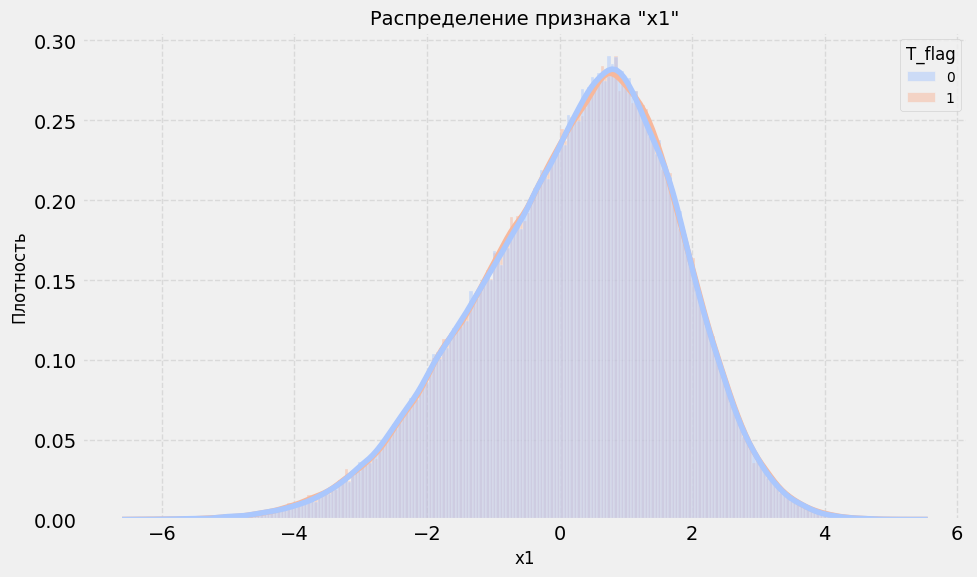

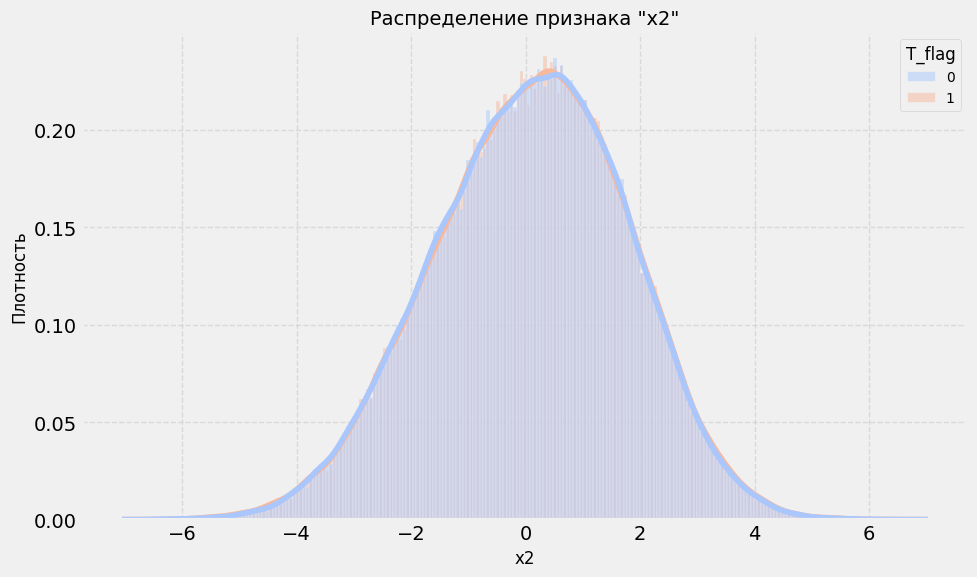

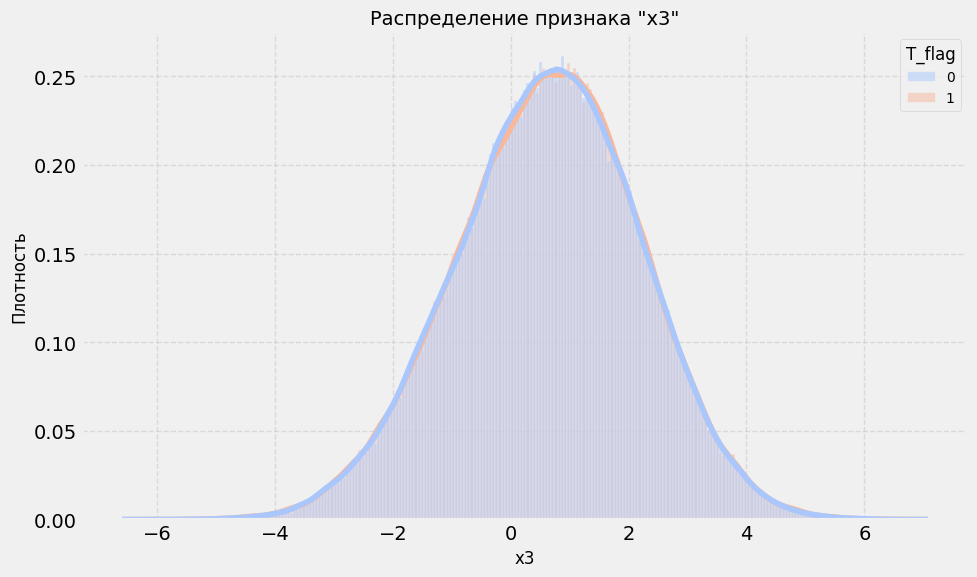

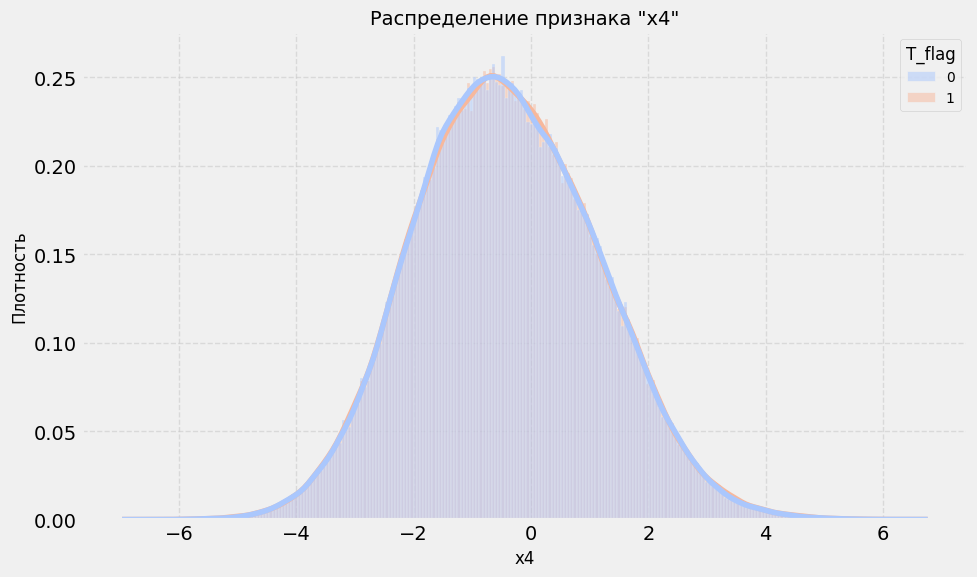

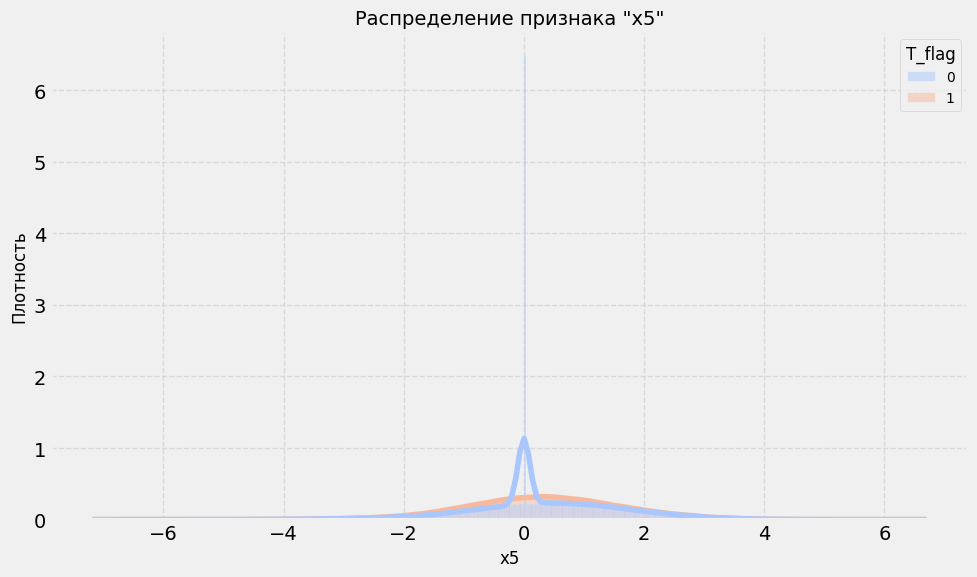

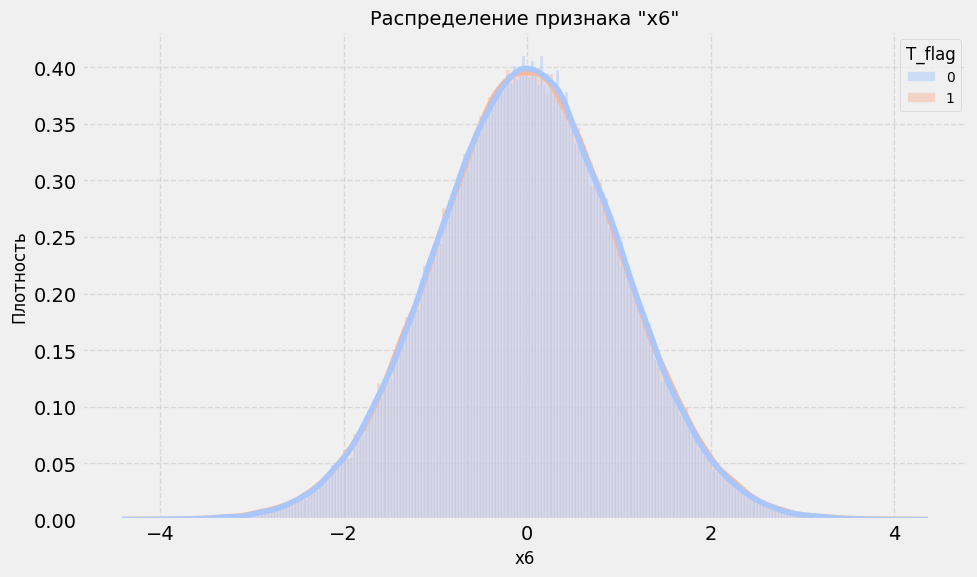

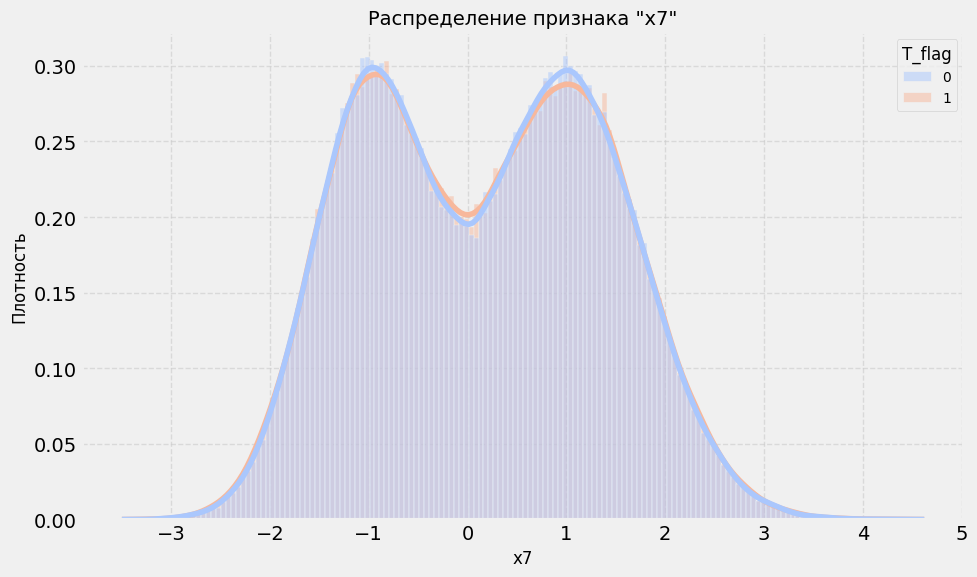

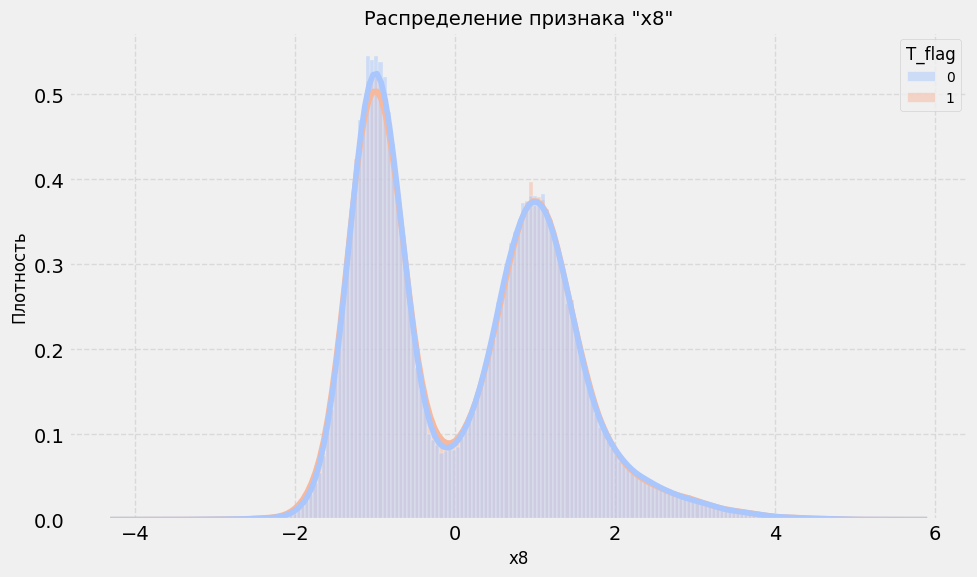

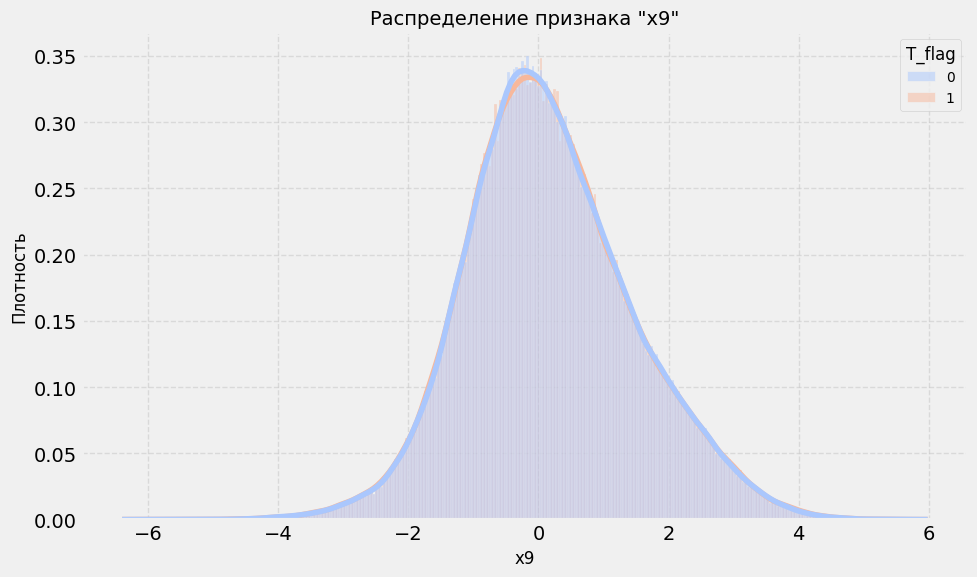

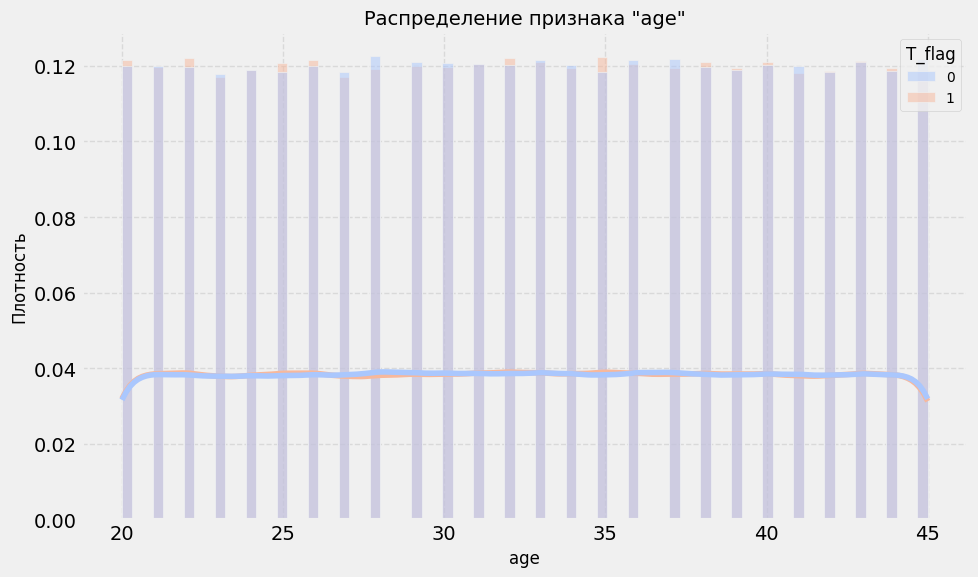

In [26]:
names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'age']

def plot_histograms(df, names, hue_column='t_flag', palette='coolwarm', figsize=(10, 6)):
    '''
    Функция для построения гистограмм для каждого столбца в списке names.
    '''
    for col in names:
        plt.figure(figsize=figsize)
        ax = sns.histplot(
            data=df,
            x=col,
            hue=hue_column,
            palette=palette,
            kde=True,
            stat='density',
            common_norm=False
        )
        plt.title(f'Распределение признака "{col}"', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Плотность', fontsize=12)

        # Настройка легенды
        if hue_column:
            sns.move_legend(ax, loc="upper right", title=hue_column.capitalize(), fontsize=10, title_fontsize=12)

        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

plot_histograms(df, names, hue_column='t_flag', palette='coolwarm')

In [31]:
def plot_channel_histograms(df, names, channel_column='channel', hue_column='t_flag', palette='coolwarm', figsize=(8, 5)):
    '''
    Функция для построения гистограмм для каждого канала и каждого столбца из списка names.
    '''
    channels = df[channel_column].dropna().unique()

    for channel in channels:
        df_channel = df[df[channel_column] == channel]

        for col in names:
            plt.figure(figsize=figsize)
            ax = sns.histplot(
                data=df_channel,
                x=col,
                hue=hue_column,
                kde=True,
                palette=palette,
                stat='density',
                common_norm=False
            )
            plt.title(f'{col} | Channel: {channel}', fontsize=14)
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Плотность', fontsize=12)

            if hue_column:
                sns.move_legend(
                    ax,
                    loc="upper right",
                    title=hue_column.capitalize(),
                    fontsize=10,
                    title_fontsize=12
                )

            plt.grid(True, linestyle='--', alpha=0.6)
            plt.tight_layout()
            plt.show()

plot_channel_histograms(df, names, channel_column='channel', hue_column='t_flag', palette='Set2', figsize=(10, 5))

Output hidden; open in https://colab.research.google.com to view.

По графикам видно статистически значимые различия, что указывает на различные подходы к формированию целевых групп. Вероятно, это связано с разными бизнес-стратегиями или целями компаний.

In [32]:
def calculate_psi(expected, actual, buckettype='bins', buckets=10):
    '''
    Рассчитывает PSI (индекс стабильности популяции) для одной переменной
    '''
    def scale_range(input_array, min_val, max_val):
        '''Масштабирует входной массив до заданного диапазона'''
        input_array = input_array - np.min(input_array)
        if max_val - min_val == 0:
            return np.zeros_like(input_array)
        input_array /= np.max(input_array) / (max_val - min_val)
        input_array += min_val
        return input_array

    if buckettype == 'bins':
        breakpoints = scale_range(np.linspace(0, 100, buckets + 1), np.min(expected), np.max(expected))
    elif buckettype == 'quantiles':
        breakpoints = np.percentile(expected, np.linspace(0, 100, buckets + 1))
    else:
        raise ValueError("Invalid buckettype. Choose 'bins' or 'quantiles'.")

    expected_hist, _ = np.histogram(expected, bins=breakpoints)
    actual_hist, _ = np.histogram(actual, bins=breakpoints)

    expected_proportions = expected_hist / len(expected)
    actual_proportions = actual_hist / len(actual)

    def sub_psi(e_perc, a_perc):
        '''Рассчитывает значение PSI для одной ячейки'''
        e_perc = max(e_perc, 1e-4)
        a_perc = max(a_perc, 1e-4)
        return (e_perc - a_perc) * np.log(e_perc / a_perc)

    psi_value = sum(sub_psi(e, a) for e, a in zip(expected_proportions, actual_proportions))
    return psi_value

In [33]:
df_dropped = df.drop(columns=['target'])
psi_results = {}

for col in names:
    psi = calculate_psi(
        expected=df_dropped.loc[df['t_flag'] == 0, col],
        actual=df_dropped.loc[df['t_flag'] == 1, col],
        buckettype='quantiles',
        buckets=10
    )
    psi_results[col] = psi
    print(f'PSI for {col}: {psi:.6f}')

# Преобразуем результаты в DataFrame для удобства анализа
psi_df = pd.DataFrame(list(psi_results.items()), columns=['Feature', 'PSI'])

PSI for x1: 0.000143
PSI for x2: 0.000082
PSI for x3: 0.000127
PSI for x4: 0.000123
PSI for x5: 0.243132
PSI for x6: 0.000108
PSI for x7: 0.000234
PSI for x8: 0.000802
PSI for x9: 0.000120
PSI for age: 0.000069


In [34]:
psi_df

,Feature,PSI
0,x1,0.000143
1,x2,0.000082
2,x3,0.000127
3,x4,0.000123
4,x5,0.243132
5,x6,0.000108
6,x7,0.000234
7,x8,0.000802
8,x9,0.000120
9,age,0.000069


Разницы особо нет. Ее видно только между $x_2$ и $x_3$, но она незначительна

In [35]:
# Просчитаем PSI для каждого канала
psi_results = []

for channel in df_dropped['channel'].unique():
    print(f"Расчет PSI для канала: {channel}")
    df_channel = df[df['channel'] == channel]

    for col in names:
        psi = calculate_psi(
            expected=df_channel.loc[df_channel['t_flag'] == 0, col],
            actual=df_channel.loc[df_channel['t_flag'] == 1, col],
            buckettype='quantiles',
            buckets=10
        )

        print(f"PSI для {col}: {psi:.6f}")
        psi_results.append({
            'Channel': channel,
            'Feature': col,
            'PSI': psi
        })

psi_df = pd.DataFrame(psi_results)

print("\nСводная таблица PSI:")
print(psi_df)

summary_psi = psi_df.groupby('Channel')['PSI'].mean().reset_index()
print("\nСреднее значение PSI по каналам:")
print(summary_psi)

Расчет PSI для канала: sms
PSI для x1: 0.000534
PSI для x2: 0.000422
PSI для x3: 0.000387
PSI для x4: 0.000388
PSI для x5: 0.000197
PSI для x6: 0.000726
PSI для x7: 0.001748
PSI для x8: 0.010030
PSI для x9: 0.000180
PSI для age: 0.000266
Расчет PSI для канала: push
PSI для x1: 0.000347
PSI для x2: 0.000357
PSI для x3: 0.000278
PSI для x4: 0.000419
PSI для x5: 0.000278
PSI для x6: 0.000088
PSI для x7: 0.000224
PSI для x8: 0.000391
PSI для x9: 0.000098
PSI для age: 0.000194
Расчет PSI для канала: banner
PSI для x1: 0.000342
PSI для x2: 0.000294
PSI для x3: 0.000684
PSI для x4: 0.000198
PSI для x5: 0.000270
PSI для x6: 0.000222
PSI для x7: 0.000484
PSI для x8: 0.000344
PSI для x9: 0.000473
PSI для age: 0.000152
Расчет PSI для канала: other_ads
PSI для x1: 0.000342
PSI для x2: 0.000294
PSI для x3: 0.000684
PSI для x4: 0.000198
PSI для x5: 9.209419
PSI для x6: 0.000222
PSI для x7: 0.000484
PSI для x8: 0.000344
PSI для x9: 0.000473
PSI для age: 0.000154

Сводная таблица PSI:
      Channel Fe

Расчеты PSI показывают, что большинство каналов и признаков демонстрируют высокую стабильность. Единственная проблема связана с каналом other_ads и признаком x5, где наблюдаются существенные изменения. Возможно это выброс

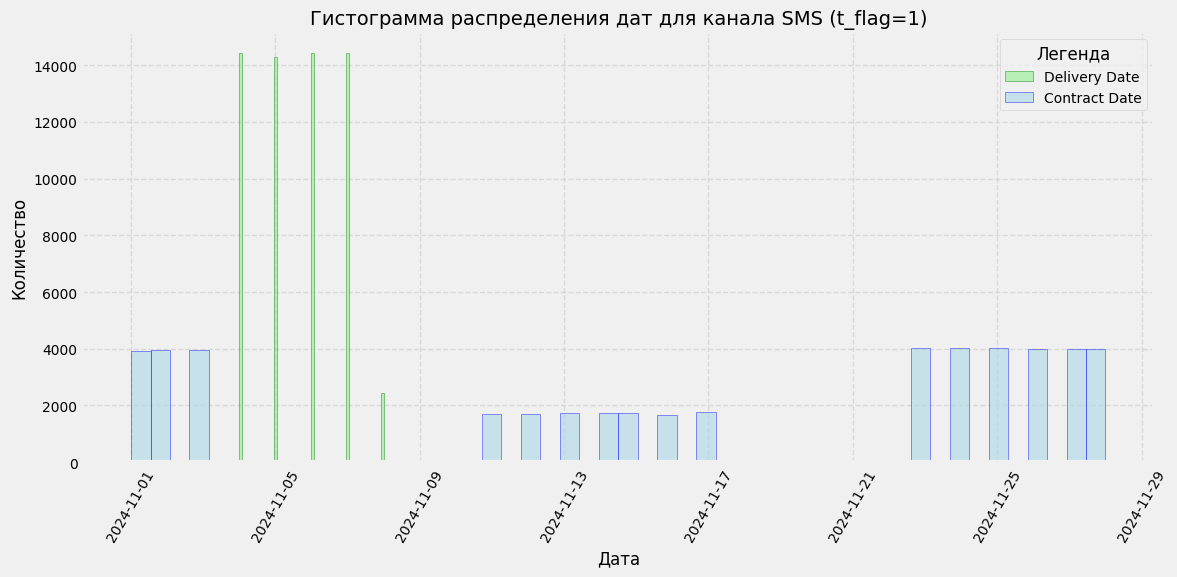

In [36]:
# Визуализируем данные для целевой переменной
plt.figure(figsize=(12, 6))

# Фильтруем данные для канала
sms_channel = df[(df['channel'] == 'sms') & (df['t_flag'] == 1)]

plt.hist(
    sms_channel['delivery_date'].dropna(),
    bins=50,
    alpha=0.6,
    label='Delivery Date',
    edgecolor='green',
    color='lightgreen'
)
plt.hist(
    sms_channel['contract_date'].dropna(),
    bins=50,
    alpha=0.6,
    label='Contract Date',
    edgecolor='blue',
    color='lightblue'
)

plt.title('Гистограмма распределения дат для канала SMS (t_flag=1)', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=60, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Легенда', fontsize=10, title_fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

По графику видно, что есть юзеры, которые совершали покупки до смс-рассылок

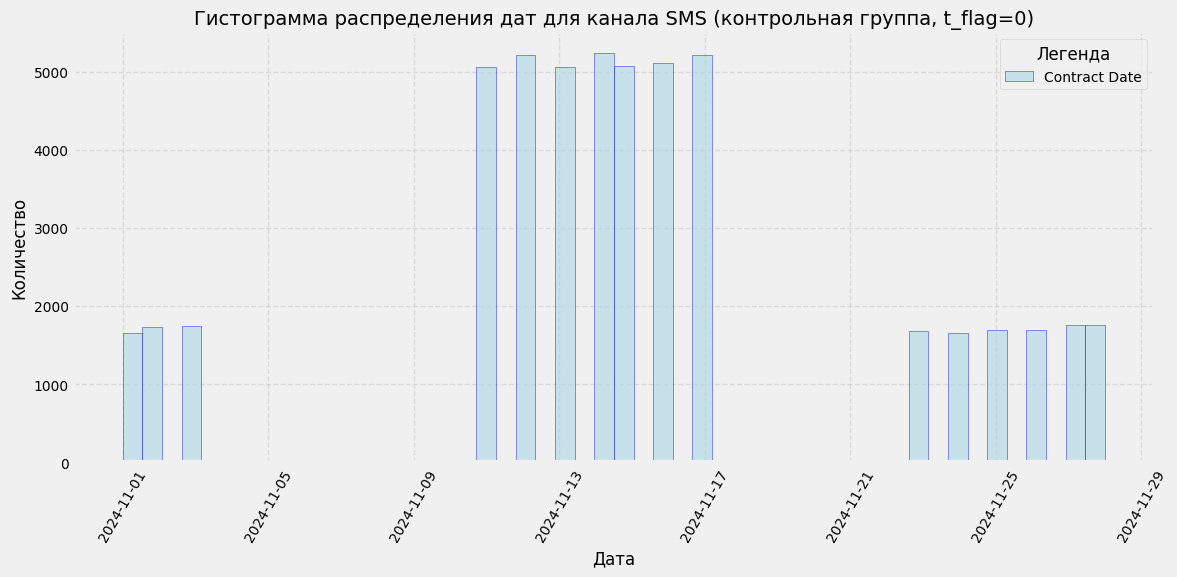

In [37]:
# Визуализируем данные для контрольной группы
plt.figure(figsize=(12, 6))

sms_chan = df[(df['channel'] == 'sms') & (df['t_flag'] == 0)]

plt.hist(
    sms_chan['contract_date'].dropna(),
    bins=50,
    alpha=0.6,
    label='Contract Date',
    edgecolor='blue',
    color='lightblue'
)

plt.title('Гистограмма распределения дат для канала SMS (контрольная группа, t_flag=0)', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=60, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Легенда', fontsize=10, title_fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Пик покупок приходится на период с 10 по 17 ноября, что может свидетельствовать о сезонной тенденции. Возможно, в середине ноября люди начинают активно готовиться к предстоящим праздникам, включая Новый год, и заранее приобретают подарки или необходимые товары

Расчет PSI показал, что распределения контрольной и целевой групп в основном очень схожи. Однако стоит учесть аномалию: для канала other_ads значение PSI признака x5 достигает 9.209419, что указывает на значительное расхождение.

Кроме того, визуализации демонстрируют, что количество покупок в контрольной группе значительно превышает показатели целевой группы. Это может свидетельствовать о потенциальных проблемах в данных или их интерпретации. Возможно, контрольная группа содержит ошибки или была неправильно сформирована, что требует дополнительного анализа для выяснения причин такого дисбаланса.

<h2> 3. Построение моделей и оценка их качества </h2>

Постройте Uplift модели по собранным кампаниям, проведите тюнинг гиперпараметров и оцените их качество (qini score). Для каждой модели также постройте qini-curve.

In [38]:
# Датасет для построения моделей
names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'age']
col_for_model = names + ['t_flag'] + ['target'] + ['channel']
df_final = df[col_for_model]
df_final.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,age,t_flag,target,channel
0,0.822461,1.233201,-1.000185,2.585873,-0.584520,-0.268274,-0.727814,1.606372,1.814158,42,1,1,sms
1,-1.224545,1.688111,0.150933,3.230149,-0.189105,0.551481,-1.229590,1.159411,-0.085720,39,1,1,push
2,-0.916137,1.368764,1.841319,-1.529691,-0.608003,-1.116932,1.178124,-0.884607,-1.726070,43,1,0,push
3,-1.620401,2.449667,1.131850,1.021660,-1.212641,0.958422,1.039261,-0.964264,-2.225545,39,0,1,sms
4,2.281651,-0.354332,1.288191,-2.754188,0.202581,0.831745,-0.002779,-1.463527,1.976755,39,0,0,push


In [39]:
# Уберем некорректные компании
df_push = df_final[df_final['channel'] == 'push'].drop('channel', axis=1)
df_banner = df_final[df_final['channel'] == 'banner'].drop('channel', axis=1)
df_other_ads = df_final[df_final['channel'] == 'other_ads'].drop('channel', axis=1)

df_push.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,age,t_flag,target
1,-1.224545,1.688111,0.150933,3.230149,-0.189105,0.551481,-1.229590,1.159411,-0.085720,39,1,1
2,-0.916137,1.368764,1.841319,-1.529691,-0.608003,-1.116932,1.178124,-0.884607,-1.726070,43,1,0
4,2.281651,-0.354332,1.288191,-2.754188,0.202581,0.831745,-0.002779,-1.463527,1.976755,39,0,0
12,-0.773911,1.877601,0.582218,1.699295,-0.667554,-0.018505,0.337289,-1.101638,-0.936927,33,0,1
17,0.457746,1.407223,0.803963,-2.002316,0.928291,-1.389908,-1.823737,-0.512010,1.840791,27,0,0


In [40]:
df_banner.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,age,t_flag,target
5,-1.821441,-0.847392,1.020568,-1.611153,0.933913,0.236984,0.933495,0.795683,-0.812175,30,0,0
7,1.768029,-1.560275,0.533826,-1.815031,-0.456184,0.274609,0.077484,0.452296,-0.224605,21,1,0
15,1.835344,1.073112,-0.629534,0.885258,-0.046115,1.253187,-1.129575,-0.397609,0.770880,36,0,1
18,-2.560545,-1.059789,1.364528,0.162776,0.918376,-0.674086,1.523135,1.669412,-1.219946,20,1,0
25,-2.473590,0.538802,2.107212,-2.082812,-1.205763,-0.820763,0.955939,0.626842,-1.203440,31,0,0


In [41]:
df_other_ads.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,age,t_flag,target
6,-1.952636,-0.479671,1.067760,-1.521329,-0.687298,0.327018,1.052708,1.244605,-0.886796,25,1,0
9,2.365226,-1.303713,0.133301,2.098386,-0.000000,0.285846,0.545567,0.293677,-0.312559,36,0,1
10,-1.691378,-2.037854,0.720855,0.078692,0.000000,0.200561,-0.473317,-1.199639,-0.021610,29,0,0
14,0.719305,-3.875339,-2.520893,1.791964,0.000000,-0.349731,0.770023,0.550603,0.507014,33,0,1
16,2.463179,-1.582447,-1.924806,2.421979,0.304232,-0.923602,1.005434,0.763082,0.183646,27,1,1


In [42]:
# Удалим аномалии
df_other_ads = df_other_ads.drop(columns = ['x5'])
df_other_ads.head()

,x1,x2,x3,x4,x6,x7,x8,x9,age,t_flag,target
6,-1.952636,-0.479671,1.067760,-1.521329,0.327018,1.052708,1.244605,-0.886796,25,1,0
9,2.365226,-1.303713,0.133301,2.098386,0.285846,0.545567,0.293677,-0.312559,36,0,1
10,-1.691378,-2.037854,0.720855,0.078692,0.200561,-0.473317,-1.199639,-0.021610,29,0,0
14,0.719305,-3.875339,-2.520893,1.791964,-0.349731,0.770023,0.550603,0.507014,33,0,1
16,2.463179,-1.582447,-1.924806,2.421979,-0.923602,1.005434,0.763082,0.183646,27,1,1


In [43]:
# Разобъем данные
X_train_push, X_test_push, y_train_push, y_test_push = train_test_split(
    df_push.drop(columns = 'target'), df_push.target,
    test_size=0.25, random_state=42, stratify=df_push.target)

X_train_banner, X_test_banner, y_train_banner, y_test_banner = train_test_split(
    df_banner.drop(columns = 'target'), df_banner.target,
    test_size=0.25, random_state=42, stratify=df_banner.target)

X_train_other_ads, X_test_other_ads, y_train_other_ads, y_test_other_ads = train_test_split(
    df_other_ads.drop(columns = 'target'), df_other_ads.target,
    test_size=0.25, random_state=42, stratify=df_other_ads.target)

In [44]:
# масштабируем данные
scaler = MinMaxScaler()
X_train_push = pd.DataFrame(scaler.fit_transform(X_train_push), columns=X_train_push.columns, index=X_train_push.index)
X_test_push = pd.DataFrame(scaler.transform(X_test_push), columns=X_test_push.columns, index=X_test_push.index)

X_train_banner = pd.DataFrame(scaler.fit_transform(X_train_banner), columns=X_train_banner.columns, index=X_train_banner.index)
X_test_banner = pd.DataFrame(scaler.transform(X_test_banner), columns=X_test_banner.columns, index=X_test_banner.index)

X_train_other_ads = pd.DataFrame(scaler.fit_transform(X_train_other_ads), columns=X_train_other_ads.columns, index=X_train_other_ads.index)
X_test_other_ads = pd.DataFrame(scaler.transform(X_test_other_ads), columns=X_test_other_ads.columns, index=X_test_other_ads.index)

In [45]:
def calculate_simple_singlemodel_uplift(X_train, X_test, y_train, random_state=42):
    '''
    Обучает логистическую регрессию и считает uplift для тестовой выборки.
    '''
    model = LogisticRegression(random_state=random_state)
    model.fit(X_train, y_train)

    X_test_0 = X_test.copy()
    X_test_0['t_flag'] = 0
    y_pred_0 = model.predict_proba(X_test_0)[:, 1]

    X_test_1 = X_test.copy()
    X_test_1['t_flag'] = 1
    y_pred_1 = model.predict_proba(X_test_1)[:, 1]

    uplift = y_pred_1 - y_pred_0

    return uplift

In [46]:
uplift_simple_solo_push = calculate_simple_singlemodel_uplift(X_train_push, X_test_push, y_train_push)

print(round(qini_auc_score(y_true=y_test_push, uplift=uplift_simple_solo_push.flatten(), treatment=X_test_push['t_flag']), 4))

0.2135


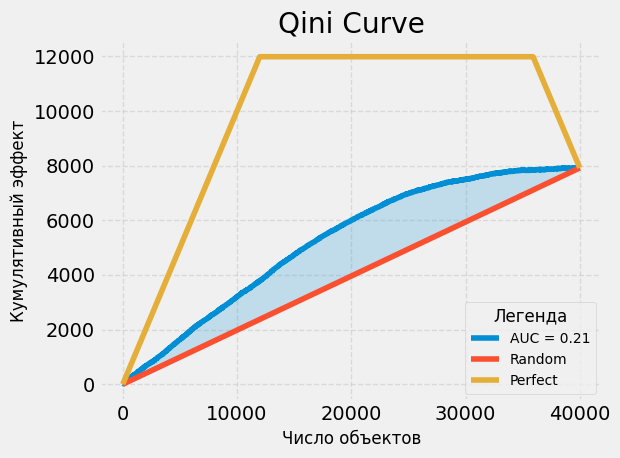

In [47]:
# Построение Qini Curve
plot_qini_curve(y_true=y_test_push, uplift=uplift_simple_solo_push.flatten(), treatment=X_test_push['t_flag'])
plt.title('Qini Curve')
plt.xlabel('Число объектов', fontsize=12)
plt.ylabel('Кумулятивный эффект', fontsize=12)
plt.legend(title='Легенда', fontsize=10, title_fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

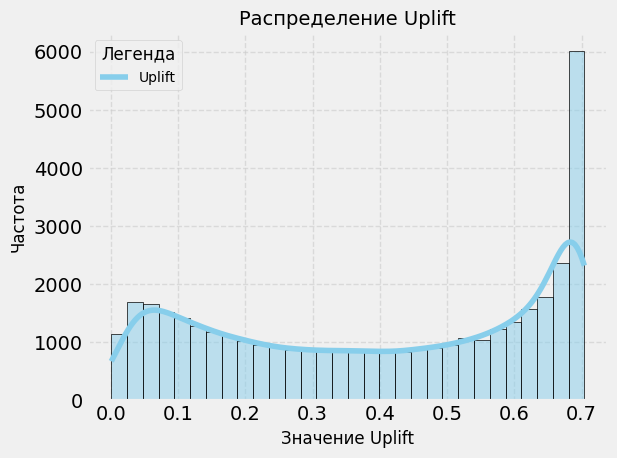

In [48]:
def plot_uplift_distribution(uplift_values, bins=30, kde=True):
    '''
    Функция для построения распределения значений Uplift.
    '''
    if isinstance(uplift_values, (pd.Series, pd.DataFrame)):
        uplift_values = uplift_values.values.flatten()
    elif isinstance(uplift_values, np.ndarray):
        uplift_values = uplift_values.flatten()


    sns.histplot(uplift_values, bins=bins, kde=kde, color='skyblue', edgecolor='black')


    plt.title('Распределение Uplift', fontsize=14)
    plt.xlabel('Значение Uplift', fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.legend(title='Легенда', labels=['Uplift'], fontsize=10, title_fontsize=12, loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_uplift_distribution(uplift_simple_solo_push)

In [49]:
# Считаем для banner channel
uplift_simple_solo_banner = calculate_simple_singlemodel_uplift(X_train_banner, X_test_banner, y_train_banner)

print(round(qini_auc_score(y_true=y_test_banner, uplift=uplift_simple_solo_banner.flatten(), treatment=X_test_banner['t_flag']), 4))

0.1937


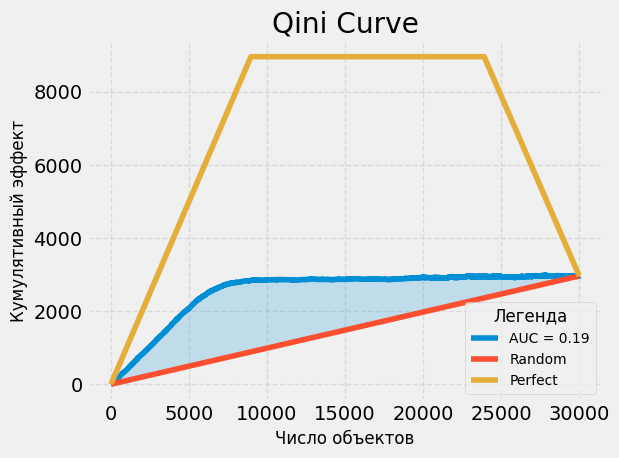

In [50]:
# Построение Qini Curve
plot_qini_curve(y_true=y_test_banner, uplift=uplift_simple_solo_banner.flatten(), treatment=X_test_banner['t_flag'])
plt.title('Qini Curve')
plt.xlabel('Число объектов', fontsize=12)
plt.ylabel('Кумулятивный эффект', fontsize=12)
plt.legend(title='Легенда', fontsize=10, title_fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

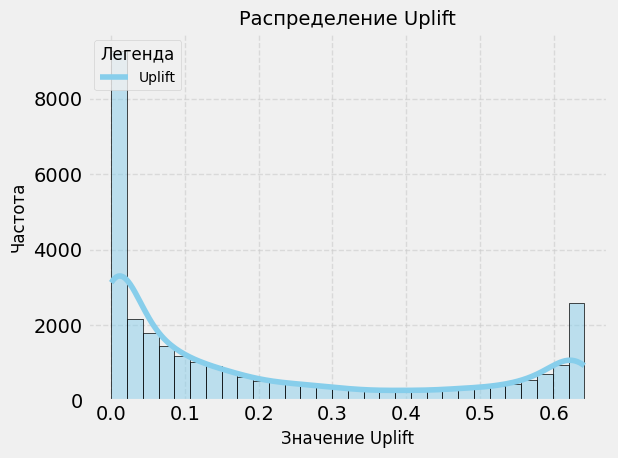

In [51]:
plot_uplift_distribution(uplift_simple_solo_banner)

In [52]:
# Считаем для Other Ads Channe
uplift_simple_solo_other_ads = calculate_simple_singlemodel_uplift(X_train_other_ads, X_test_other_ads, y_train_other_ads)

print(round(qini_auc_score(y_true=y_test_other_ads, uplift=uplift_simple_solo_other_ads.flatten(), treatment=X_test_other_ads['t_flag']), 4))

0.2036


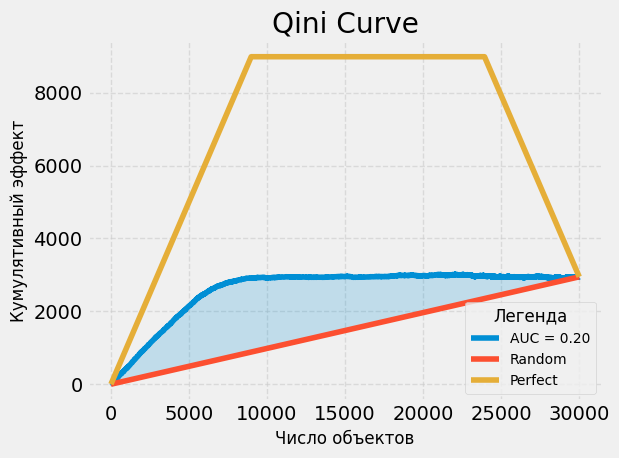

In [53]:
# Построение Qini Curve для Other Ads Channe
plot_qini_curve(y_true=y_test_other_ads, uplift=uplift_simple_solo_other_ads.flatten(),treatment=X_test_other_ads['t_flag'])
plt.title('Qini Curve')
plt.xlabel('Число объектов', fontsize=12)
plt.ylabel('Кумулятивный эффект', fontsize=12)
plt.legend(title='Легенда', fontsize=10, title_fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

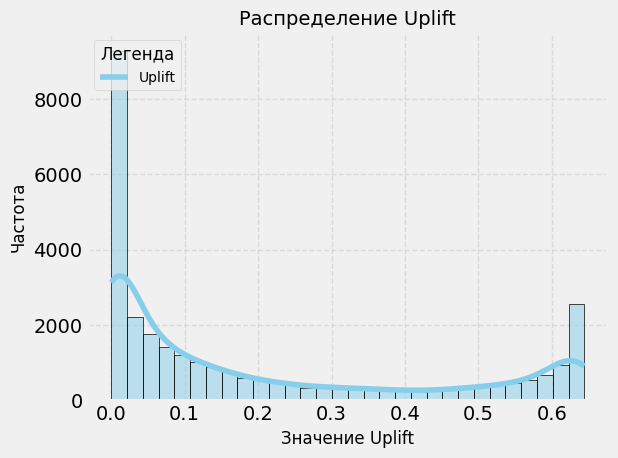

In [54]:
plot_uplift_distribution(uplift_simple_solo_other_ads)

Получились данные низкого качества. Посмотрим на другие модели.

Qini AUC Score: 0.3770


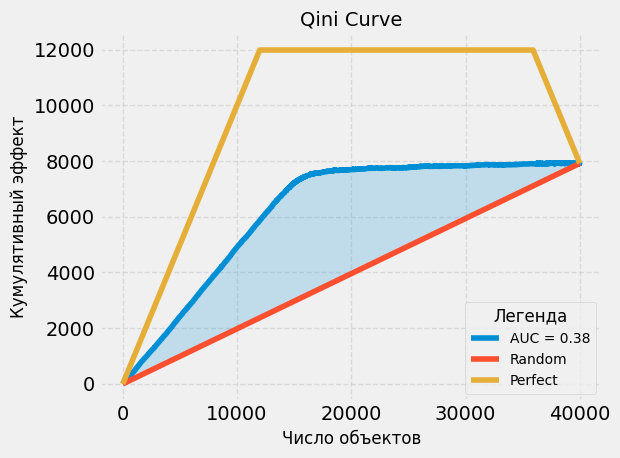

In [55]:
# Push
model_1 = LogisticRegression(random_state=42)
model_2 = LogisticRegression(random_state=52)

two_models = TwoModels(
    estimator_trmnt=model_1,
    estimator_ctrl=model_2,
    method='vanilla'
)

pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('model_uplift', two_models)
])


push_twomodel = pipeline.fit(
    X_train_push.drop(columns='t_flag'),
    y_train_push,
    model_uplift__treatment=X_train_push['t_flag']
)


uplift_pred_push = push_twomodel.predict(X_test_push.drop(columns='t_flag'))

qini_auc = qini_auc_score(
    y_true=y_test_push,
    uplift=uplift_pred_push,
    treatment=X_test_push['t_flag']
)
print(f"Qini AUC Score: {qini_auc:.4f}")

# Построение Qini Curve
plot_qini_curve(
    y_true=y_test_push,
    uplift=uplift_pred_push,
    treatment=X_test_push['t_flag']
)

plt.title("Qini Curve", fontsize=14)
plt.xlabel("Число объектов", fontsize=12)
plt.ylabel("Кумулятивный эффект", fontsize=12)
plt.legend(title="Легенда", fontsize=10, title_fontsize=12, loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

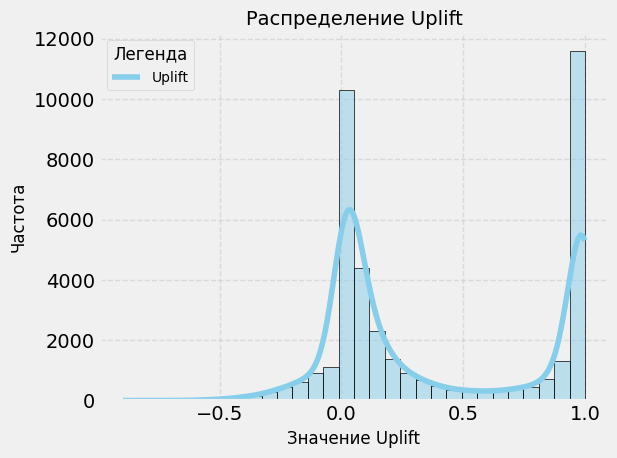

In [56]:
plot_uplift_distribution(uplift_pred_push)

Qini AUC Score: 0.2087


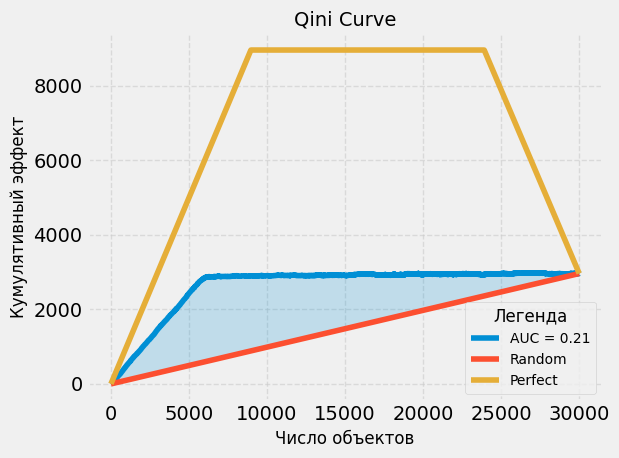

In [57]:
# Banner
model_1 = LogisticRegression(random_state=42)
model_2 = LogisticRegression(random_state=52)

two_models = TwoModels(
    estimator_trmnt=model_1,
    estimator_ctrl=model_2,
    method='vanilla'
)

pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('model_uplift', two_models)
])

banner_twomodel = pipeline.fit(
    X_train_banner.drop(columns='t_flag'),
    y_train_banner,
    model_uplift__treatment=X_train_banner['t_flag']
)

uplift_pred_banner = banner_twomodel.predict(X_test_banner.drop(columns='t_flag'))

qini_auc = qini_auc_score(
    y_true=y_test_banner,
    uplift=uplift_pred_banner,
    treatment=X_test_banner['t_flag']
)
print(f"Qini AUC Score: {qini_auc:.4f}")


plot_qini_curve(
    y_true=y_test_banner,
    uplift=uplift_pred_banner,
    treatment=X_test_banner['t_flag']
)
plt.title("Qini Curve", fontsize=14)
plt.xlabel("Число объектов", fontsize=12)
plt.ylabel("Кумулятивный эффект", fontsize=12)
plt.legend(title="Легенда", fontsize=10, title_fontsize=12, loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

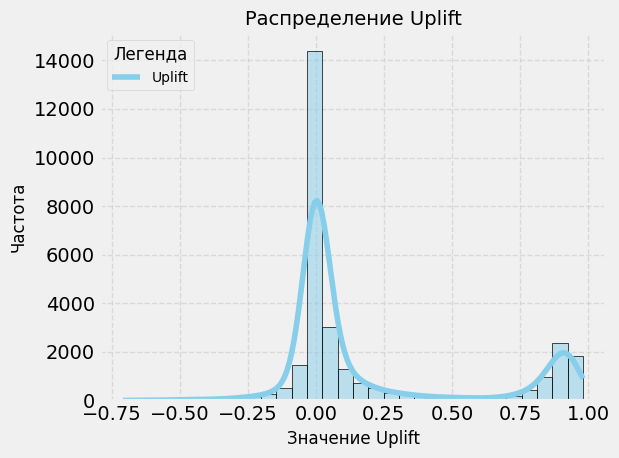

In [58]:
plot_uplift_distribution(uplift_pred_banner)

Qini AUC Score: 0.2133


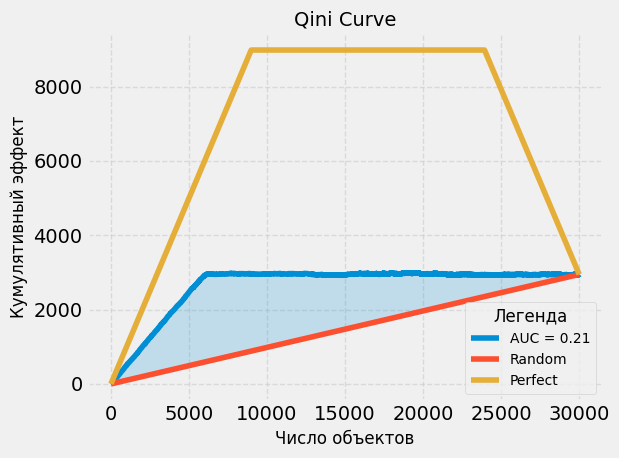

In [59]:
# Other Ads
model_1 = LogisticRegression(random_state=42)
model_2 = LogisticRegression(random_state=52)

two_models = TwoModels(
    estimator_trmnt=model_1,
    estimator_ctrl=model_2,
    method='vanilla'
)

pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('model_uplift', two_models)
])

other_ads_twomodel = pipeline.fit(
    X_train_other_ads.drop(columns='t_flag'),
    y_train_other_ads,
    model_uplift__treatment=X_train_other_ads['t_flag']
)

uplift_pred_other_ads = other_ads_twomodel.predict(X_test_other_ads.drop(columns='t_flag'))

qini_auc = qini_auc_score(
    y_true=y_test_other_ads,
    uplift=uplift_pred_other_ads,
    treatment=X_test_other_ads['t_flag']
)
print(f"Qini AUC Score: {qini_auc:.4f}")


plot_qini_curve(
    y_true=y_test_other_ads,
    uplift=uplift_pred_other_ads,
    treatment=X_test_other_ads['t_flag']
)
plt.title("Qini Curve", fontsize=14)
plt.xlabel("Число объектов", fontsize=12)
plt.ylabel("Кумулятивный эффект", fontsize=12)
plt.legend(title="Легенда", fontsize=10, title_fontsize=12, loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

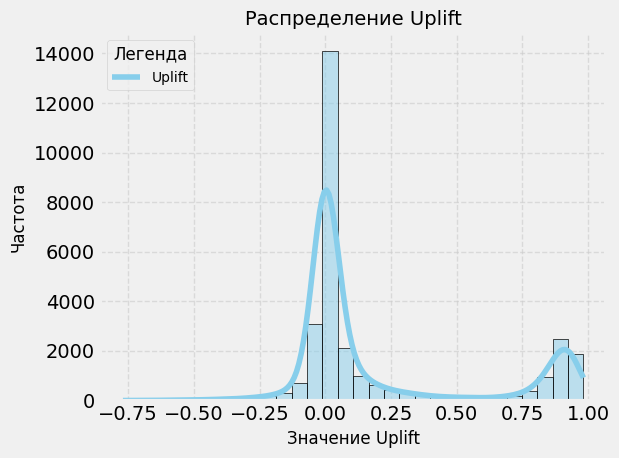

In [60]:
plot_uplift_distribution(uplift_pred_other_ads)

Согласно графикам, мы улучшили результаты моделей

In [61]:
def calculate_twomodel_uplift_calibrated(
    X_train, X_test, y_train, treatment_train, treatment_test, random_state=42
):
    '''
    Обучает калиброванную модель TwoModels для расчета uplift.
    '''
    model_1 = LogisticRegression(random_state=random_state + 1)
    model_2 = LogisticRegression(random_state=random_state + 2)

    calibrated_model_1 = CalibratedClassifierCV(model_1, cv=5, method='isotonic')
    calibrated_model_2 = CalibratedClassifierCV(model_2, cv=5, method='isotonic')

    two_models = TwoModels(
        estimator_trmnt=calibrated_model_1,
        estimator_ctrl=calibrated_model_2,
        method='vanilla'
    )

    two_models.fit(
        X=X_train.drop(columns='t_flag'),
        y=y_train,
        treatment=treatment_train
    )

    uplift_pred = two_models.predict(X_test.drop(columns='t_flag'))

    return uplift_pred

0.3785


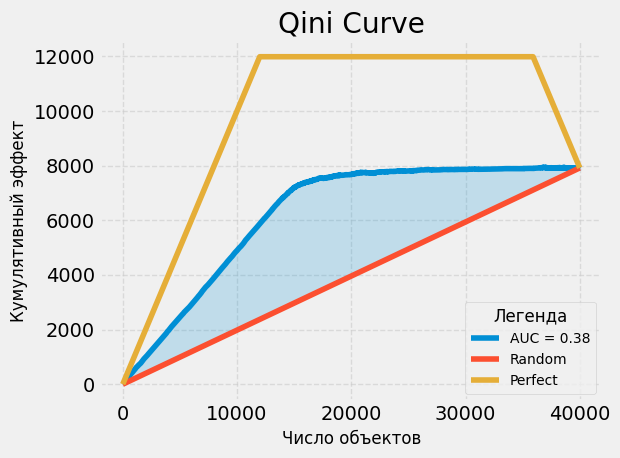

In [62]:
uplift_twomode_calibrated_push = calculate_twomodel_uplift_calibrated(X_train_push, X_test_push, y_train_push,  X_train_push['t_flag'], X_test_push['t_flag'])
print(round(qini_auc_score(y_true=y_test_push,  uplift=uplift_twomode_calibrated_push, treatment=X_test_push['t_flag']), 4))

plot_qini_curve(y_true=y_test_push, uplift=uplift_twomode_calibrated_push, treatment=X_test_push['t_flag'])
plt.title('Qini Curve')
plt.xlabel('Число объектов', fontsize=12)
plt.ylabel('Кумулятивный эффект', fontsize=12)
plt.legend(title='Легенда', fontsize=10, title_fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

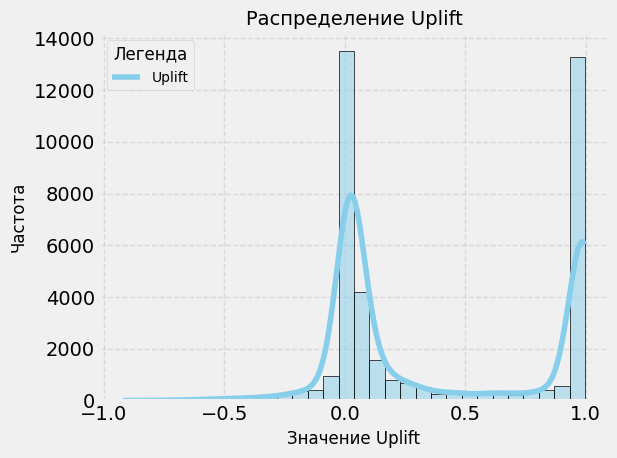

In [63]:
plot_uplift_distribution(uplift_twomode_calibrated_push)

0.2088


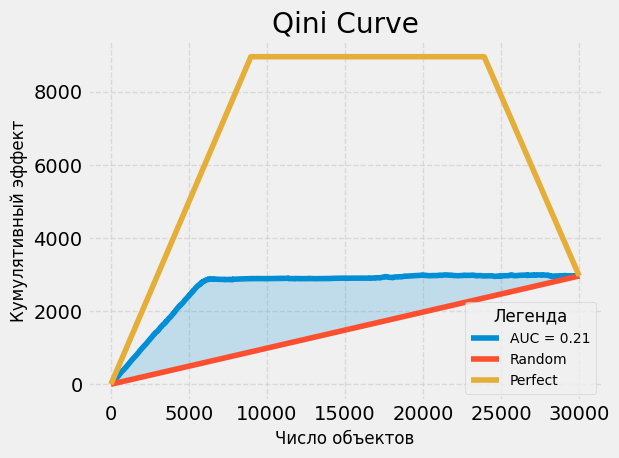

In [64]:
# Использование функции для bammer channel и построение графика
uplift_twomode_calibrated_banner = calculate_twomodel_uplift_calibrated(X_train_banner, X_test_banner, y_train_banner, X_train_banner['t_flag'], X_test_banner['t_flag'])
print(round(qini_auc_score(y_true=y_test_banner, uplift=uplift_twomode_calibrated_banner, treatment=X_test_banner['t_flag']), 4))

plot_qini_curve(y_true=y_test_banner, uplift=uplift_twomode_calibrated_banner, treatment=X_test_banner['t_flag'])
plt.title('Qini Curve')
plt.xlabel('Число объектов', fontsize=12)
plt.ylabel('Кумулятивный эффект', fontsize=12)
plt.legend(title='Легенда', fontsize=10, title_fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

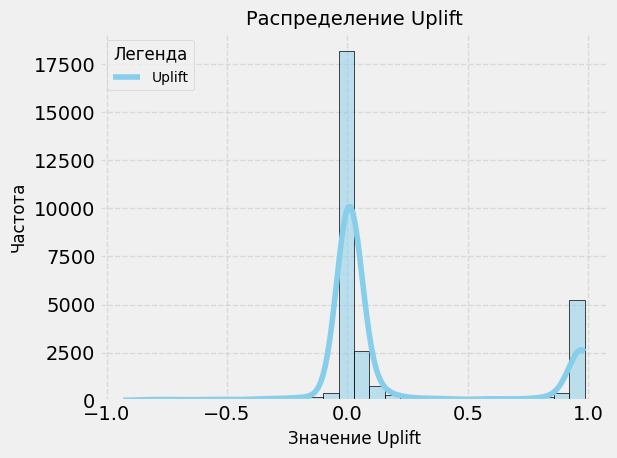

In [65]:
plot_uplift_distribution(uplift_twomode_calibrated_banner)

0.215


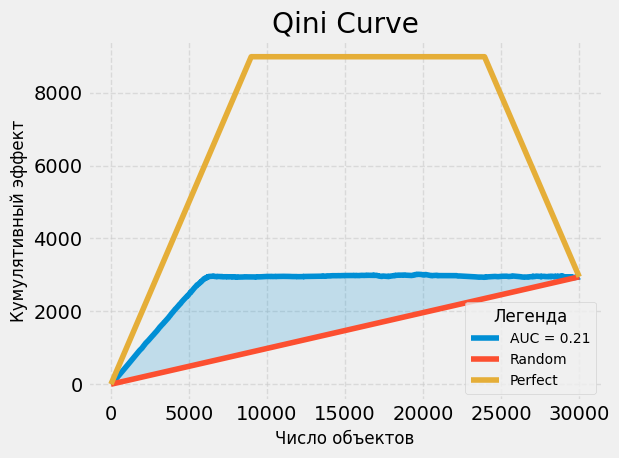

In [66]:
# Использование функции для other ads channel и построение графика
uplift_twomode_calibrated_other_ads = calculate_twomodel_uplift_calibrated(X_train_other_ads, X_test_other_ads, y_train_other_ads, X_train_other_ads['t_flag'], X_test_other_ads['t_flag'])
print(round(qini_auc_score(y_true=y_test_other_ads, uplift=uplift_twomode_calibrated_other_ads, treatment=X_test_other_ads['t_flag']), 4))

plot_qini_curve(y_true=y_test_other_ads, uplift=uplift_twomode_calibrated_other_ads, treatment=X_test_other_ads['t_flag'])
plt.title('Qini Curve')
plt.xlabel('Число объектов', fontsize=12)
plt.ylabel('Кумулятивный эффект', fontsize=12)
plt.legend(title='Легенда', fontsize=10, title_fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

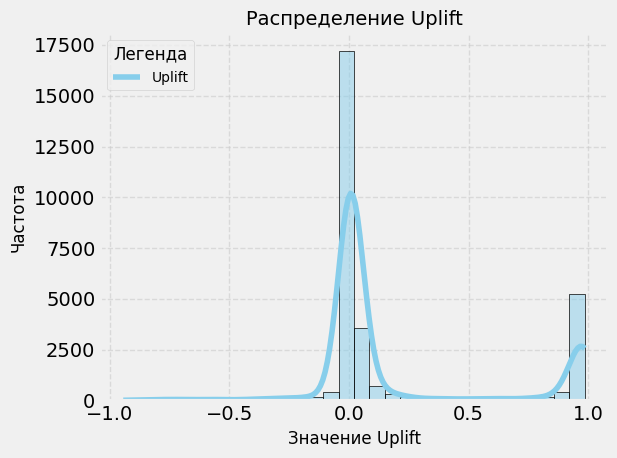

In [67]:
plot_uplift_distribution(uplift_twomode_calibrated_other_ads)

 Попробуем именить модель тк нет особой разницы

In [68]:
def calculate_classtransformation_uplift(
    X_train, X_test, y_train, treatment_train, base_model=None, random_state=42
):
    '''
    Обучает модель Uplift с использованием метода ClassTransformation.
    '''
    X_train = X_train.drop(columns=['t_flag'], errors='ignore')
    X_test = X_test.drop(columns=['t_flag'], errors='ignore')

    if base_model is None:
        base_model = RandomForestClassifier(n_estimators=100, random_state=random_state)

    uplift_model = ClassTransformation(base_model)
    uplift_model.fit(X_train, y_train, treatment_train)
    uplift_preds = uplift_model.predict(X_test)

    return uplift_preds

0.3843


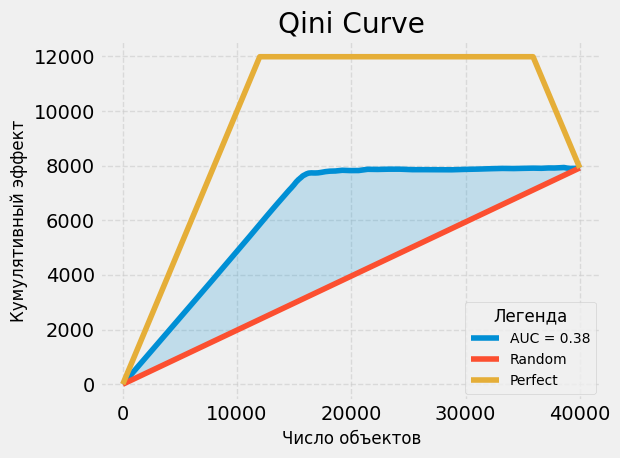

In [69]:
# реализуем для push
uplift_classtransformation_push = calculate_classtransformation_uplift(X_train=X_train_push, X_test=X_test_push, y_train=y_train_push, treatment_train=X_train_push['t_flag'])
print(round(qini_auc_score(y_true=y_test_push, uplift=uplift_classtransformation_push, treatment=X_test_push['t_flag']), 4))

plot_qini_curve(y_true=y_test_push, uplift=uplift_classtransformation_push, treatment=X_test_push['t_flag'])
plt.title('Qini Curve')
plt.xlabel('Число объектов', fontsize=12)
plt.ylabel('Кумулятивный эффект', fontsize=12)
plt.legend(title='Легенда', fontsize=10, title_fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

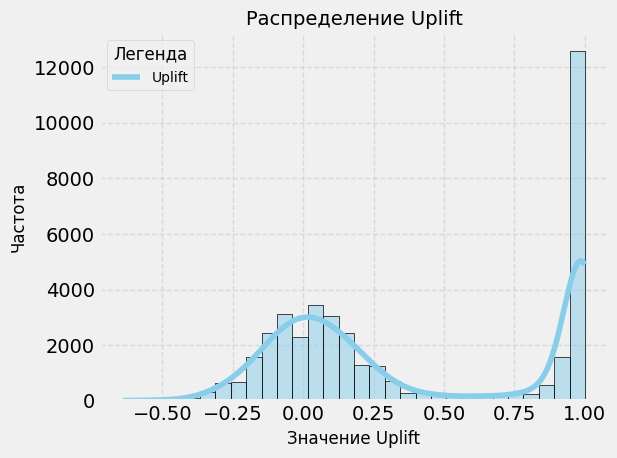

In [70]:
plot_uplift_distribution(uplift_classtransformation_push)

0.2088


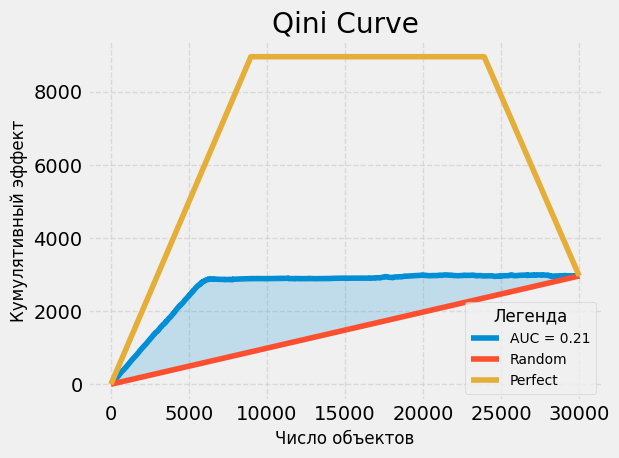

In [71]:
# реализуем для Banner Channel и построим графики
uplift_classtransformation_banner = calculate_classtransformation_uplift(X_train=X_train_banner, X_test=X_test_banner, y_train=y_train_banner, treatment_train=X_train_banner['t_flag'])
print(round(qini_auc_score(y_true=y_test_banner, uplift=uplift_twomode_calibrated_banner, treatment=X_test_banner['t_flag']), 4))

plot_qini_curve(y_true=y_test_banner, uplift=uplift_twomode_calibrated_banner, treatment=X_test_banner['t_flag'])
plt.title('Qini Curve')
plt.xlabel('Число объектов', fontsize=12)
plt.ylabel('Кумулятивный эффект', fontsize=12)
plt.legend(title='Легенда', fontsize=10, title_fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

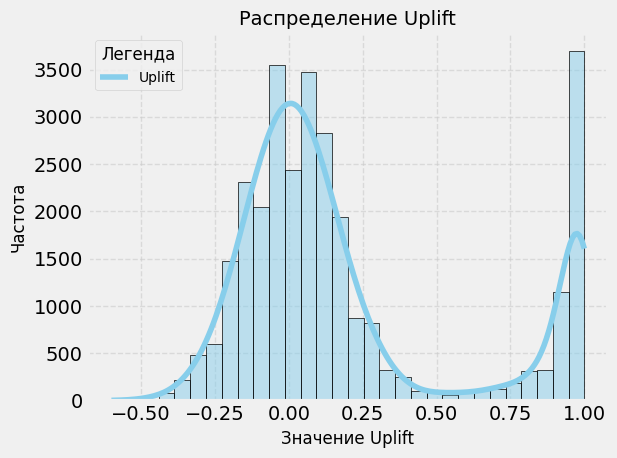

In [72]:
plot_uplift_distribution(uplift_classtransformation_banner)

0.2132


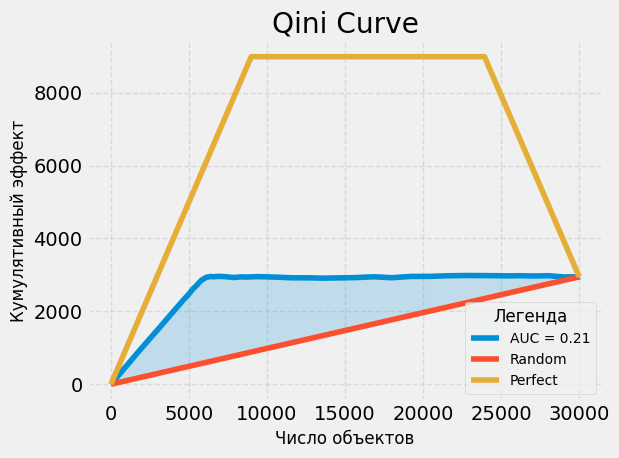

In [73]:
# реализуем для Other Ads Channel и построим график
uplift_classtransformation_other_ads = calculate_classtransformation_uplift(X_train_other_ads, X_test_other_ads, y_train_other_ads, X_train_other_ads['t_flag'])
print(round(qini_auc_score(y_true=y_test_other_ads, uplift=uplift_classtransformation_other_ads, treatment=X_test_other_ads['t_flag']), 4))

plot_qini_curve(y_true=y_test_other_ads, uplift=uplift_classtransformation_other_ads, treatment=X_test_other_ads['t_flag'])
plt.title('Qini Curve')
plt.xlabel('Число объектов', fontsize=12)
plt.ylabel('Кумулятивный эффект', fontsize=12)
plt.legend(title='Легенда', fontsize=10, title_fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

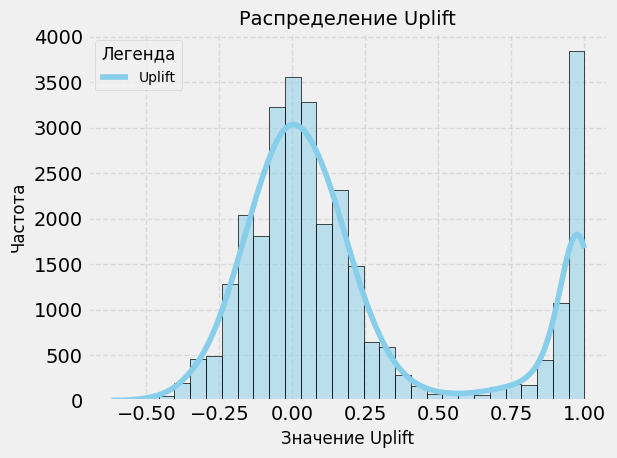

In [74]:
plot_uplift_distribution(uplift_classtransformation_other_ads)

In [75]:
def calculate_rf_uplift(
    X_train, y_train, X_test, y_test, control_name='0', random_state=42
):
    '''
    Обучает модель UpliftRandomForestClassifier и вычисляет Qini AUC Score.
    '''
    X_train = X_train.copy()
    X_test = X_test.copy()

    X_train['t_flag'] = X_train['t_flag'].astype('float').astype('int').astype('str')
    X_test['t_flag'] = X_test['t_flag'].astype('float').astype('int').astype('str')

    uplift_forest = UpliftRandomForestClassifier(control_name=control_name, random_state=random_state)

    uplift_forest.fit(
        X=X_train.drop(columns='t_flag').values,
        y=y_train.values,
        treatment=X_train['t_flag'].values
    )
    uplift_preds = uplift_forest.predict(X=X_test.drop(columns='t_flag').values)

    qini_score = qini_auc_score(
        y_true=y_test,
        uplift=uplift_preds.reshape(-1),
        treatment=X_test['t_flag'].astype('int')
    )
    print(f"Qini AUC Score: {qini_score:.4f}")

    plot_qini_curve(
        y_true=y_test,
        uplift=pd.Series(uplift_preds.reshape(-1), index=X_test.index),
        treatment=X_test['t_flag'].astype('int')
    )

    plt.title("Qini Curve (UpliftRandomForestClassifier)", fontsize=14)
    plt.xlabel("Число объектов", fontsize=12)
    plt.ylabel("Кумулятивный эффект", fontsize=12)
    plt.legend(title="Легенда", fontsize=10, title_fontsize=12, loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return qini_score

Qini AUC Score: 0.3741


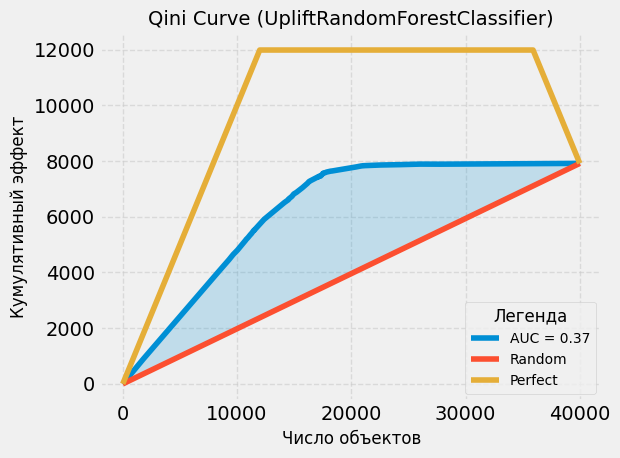

In [76]:
uplift_push_random = calculate_rf_uplift(X_train_push, y_train_push, X_test_push, y_test_push)

Qini AUC Score: 0.2072


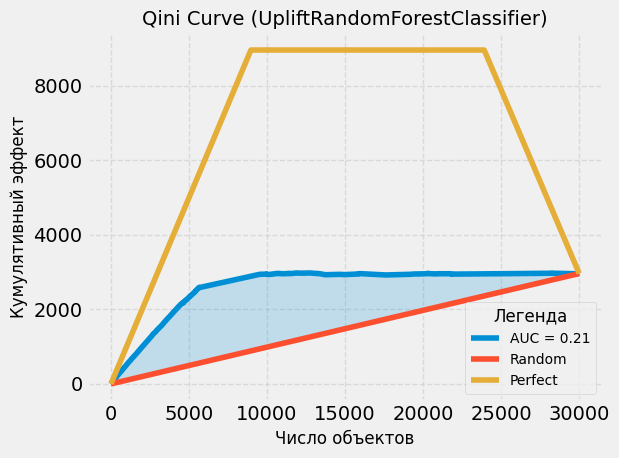

In [77]:
uplift_banner_random = calculate_rf_uplift(X_train_banner, y_train_banner, X_test_banner, y_test_banner)

Qini AUC Score: 0.2107


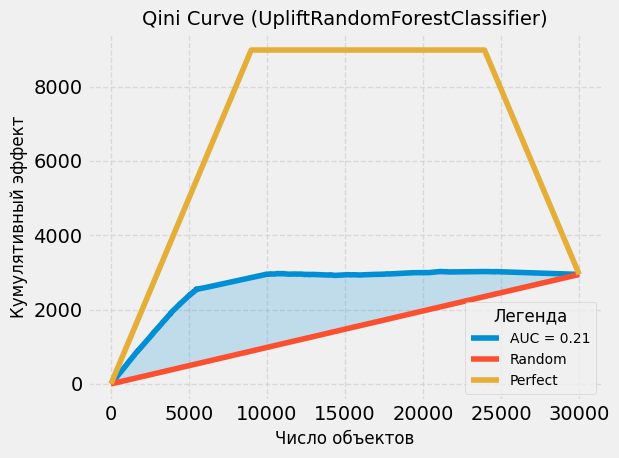

In [78]:
upliftother_ads = calculate_rf_uplift(X_train_other_ads, y_train_other_ads, X_test_other_ads, y_test_other_ads)

Оптимизируем гиперпараметры с помощью Optuna и GridSearch.

In [79]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

def objective_tm_lr(trial, X_train, y_train, cv):
    '''
    Функция для оптимизации гиперпараметров модели TwoModels с помощью Optuna.
    '''
    param = {
        'C_1': trial.suggest_float("C_1", 0.1, 3),
        'C_2': trial.suggest_float("C_2", 0.1, 3),
        'method': trial.suggest_categorical("method", ['vanilla', 'ddr_control', 'ddr_treatment'])
    }

    model_1 = LogisticRegression(random_state=42, C=param['C_1'], max_iter=1000)
    model_2 = LogisticRegression(random_state=52, C=param['C_2'], max_iter=1000)

    two_models = TwoModels(
        estimator_trmnt=model_1,
        estimator_ctrl=model_2,
        method=param['method']
    )
    pipe = Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('model_uplift', two_models)
    ])

    qini_scorer = make_uplift_scorer("qini_auc_score", treatment=X_train['t_flag'])

    cross_val = cross_validate(
        pipe,
        X=X_train.drop(columns='t_flag'),
        y=y_train,
        fit_params={'model_uplift__treatment': X_train['t_flag']},
        scoring=qini_scorer,
        cv=cv,
        return_train_score=True
    )
    mean_score = cross_val['test_score'].mean()
    std_score = cross_val['test_score'].std()
    return mean_score - std_score

In [80]:
# Создание и оптимизация исследования Optuna
study = optuna.create_study(direction="maximize")
study.optimize(
    lambda trial: objective_tm_lr(trial, X_train_push, y_train_push, skf),
    n_trials=500,
    show_progress_bar=True
)

best_params = study.best_params
print("Лучшие параметры:", best_params)

best_C_1 = best_params['C_1']
best_C_2 = best_params['C_2']
best_method = best_params['method']

model_1 = LogisticRegression(random_state=42, C=best_C_1, max_iter=1000)
model_2 = LogisticRegression(random_state=50, C=best_C_2, max_iter=1000)

two_models = TwoModels(
    estimator_trmnt=model_1,
    estimator_ctrl=model_2,
    method=best_method
)


pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('model_uplift', two_models)
])

pipe.fit(
    X=X_train_push.drop(columns='t_flag'),
    y=y_train_push,
    model_uplift__treatment=X_train_push['t_flag']
)

y_pred_uplift = pipe.predict(X_test_push.drop(columns='t_flag'))

qini_score = qini_auc_score(
    y_true=y_test_push,
    uplift=y_pred_uplift,
    treatment=X_test_push['t_flag']
)
print(f"Qini AUC Score: {qini_score:.4f}")

[I 2025-03-16 13:03:17,823] A new study created in memory with name: no-name-05220983-469f-4d7b-86af-1def69e95338


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2025-03-16 13:03:21,902] Trial 0 finished with value: 0.38095443069509854 and parameters: {'C_1': 1.9820383829047217, 'C_2': 2.8656988836147055, 'method': 'ddr_control'}. Best is trial 0 with value: 0.38095443069509854.
[I 2025-03-16 13:03:26,120] Trial 1 finished with value: 0.37813789833947953 and parameters: {'C_1': 1.2394455105672713, 'C_2': 2.3085176913132743, 'method': 'ddr_treatment'}. Best is trial 0 with value: 0.38095443069509854.
[I 2025-03-16 13:03:31,556] Trial 2 finished with value: 0.38138011856057746 and parameters: {'C_1': 2.2941073528274543, 'C_2': 1.2486152252686198, 'method': 'ddr_control'}. Best is trial 2 with value: 0.38138011856057746.
[I 2025-03-16 13:03:35,606] Trial 3 finished with value: 0.3789146408864468 and parameters: {'C_1': 2.264826645176533, 'C_2': 0.5466490824547691, 'method': 'ddr_treatment'}. Best is trial 2 with value: 0.38138011856057746.
[I 2025-03-16 13:03:39,688] Trial 4 finished with value: 0.38100639915151696 and parameters: {'C_1': 0.984

Оптимизация с использованием Optuna позволила выявить наиболее эффективные комбинации параметров для модели uplift.
Лучший результат достигнут при использовании метода 'ddr_control' и значений параметров C_1 и C_2 в узком диапазоне.

<h2>4. Подготовка ответа в требуемом формате и подготовка выводов </h2>


In [81]:
# Подготовка данных
col = names + ['user_id']
prediction = aggs[aggs["report_dt"] == '2025-01-01'][col]

prediction.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,age,user_id
104548,0.654343,-1.439286,-0.011475,2.039457,0.843580,-0.977480,-0.768019,-1.044127,0.025673,26,1066338
404628,0.238281,-1.221378,0.338246,2.578613,-0.738267,-0.293309,-1.623151,-0.419945,-0.285695,42,25872
129453,1.262071,-0.590011,-1.487096,-0.966672,2.740715,0.312791,-0.356535,-0.539563,1.401530,28,4107442
281997,-6.942073,0.107627,1.760962,4.424731,1.980637,0.238544,-1.329872,0.288694,-1.625620,32,2047420
326691,-2.200147,0.694959,-1.620087,4.003986,0.808261,0.214216,-0.330887,-1.386118,1.525752,22,1120643


In [82]:
prediction.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,age,user_id
291841,-0.852355,2.184957,-0.798753,1.716976,-0.200655,-1.836446,-0.407546,-1.819025,0.756988,36,4034876
90056,1.343056,0.408401,-2.688668,-0.235793,-2.562377,-0.119657,-1.866503,0.273952,2.557688,31,114148
250338,-0.999208,0.527982,-2.094625,2.747209,2.326767,0.237984,-1.318151,-1.509199,1.989945,39,143255
342943,-1.970020,1.180142,-0.572525,1.052022,-0.654687,0.744590,-2.342623,-0.136155,0.582400,40,132172
454256,0.289840,1.089333,-1.081154,0.259124,-1.985497,1.429450,-2.007802,-0.091926,1.052896,45,2059711


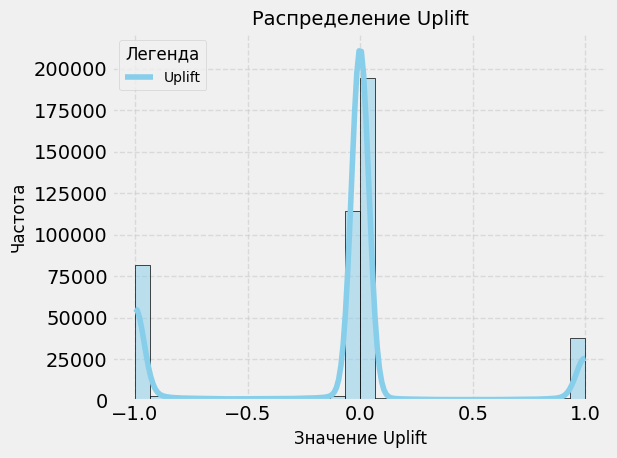

In [83]:
# Используем модель TwoModels
prediction_push = push_twomodel.predict(prediction.drop(columns='user_id'))
prediction_banner = banner_twomodel.predict(prediction.drop(columns='user_id'))
prediction_other_ads = other_ads_twomodel.predict(prediction.drop(columns=['x5', 'user_id']))

plot_uplift_distribution(prediction_push)

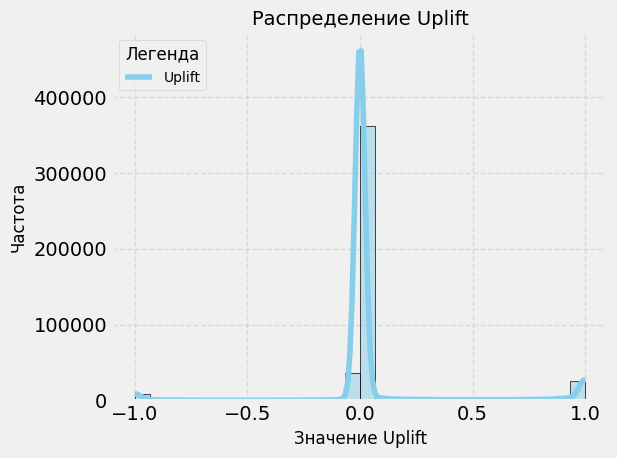

In [84]:
plot_uplift_distribution(prediction_banner)

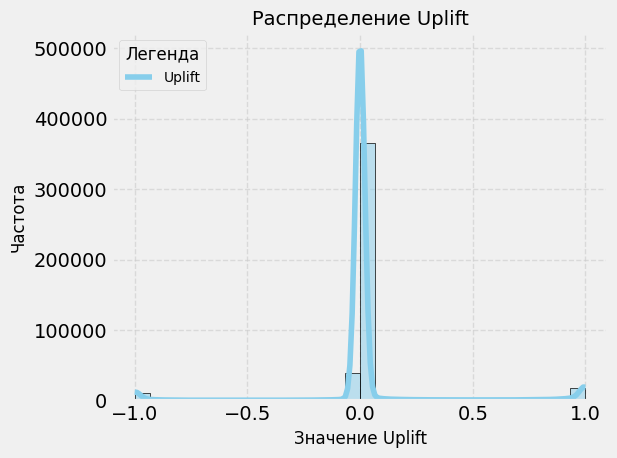

In [85]:
plot_uplift_distribution(prediction_other_ads)

In [86]:
prediction['predict_push'] = prediction_push
prediction['predict_banner'] = prediction_banner
prediction['predict_other_ads'] = prediction_other_ads
prediction.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,age,user_id,predict_push,predict_banner,predict_other_ads
104548,0.654343,-1.439286,-0.011475,2.039457,0.843580,-0.977480,-0.768019,-1.044127,0.025673,26,1066338,-9.999922e-01,2.884474e-04,3.364106e-04
404628,0.238281,-1.221378,0.338246,2.578613,-0.738267,-0.293309,-1.623151,-0.419945,-0.285695,42,25872,0.000000e+00,6.568877e-11,5.154605e-11
129453,1.262071,-0.590011,-1.487096,-0.966672,2.740715,0.312791,-0.356535,-0.539563,1.401530,28,4107442,5.212450e-18,1.137931e-02,3.238344e-04
281997,-6.942073,0.107627,1.760962,4.424731,1.980637,0.238544,-1.329872,0.288694,-1.625620,32,2047420,0.000000e+00,1.077727e-23,4.585589e-23
326691,-2.200147,0.694959,-1.620087,4.003986,0.808261,0.214216,-0.330887,-1.386118,1.525752,22,1120643,-1.877910e-06,0.000000e+00,0.000000e+00


In [88]:
# Добавим столбцы channel и uplift
prediction['uplift'] = prediction[['predict_push', 'predict_banner', 'predict_other_ads']].max(axis=1)
prediction['channel'] = prediction[['predict_push', 'predict_banner', 'predict_other_ads']].idxmax(axis=1)
prediction = prediction[['user_id', 'uplift', 'channel']]

In [89]:
# если uplift >= 0 то высыплаем расслыки
prediction.loc[:, 'channel'] = prediction['channel'].str.replace('predict_', '', regex=False)
prediction.loc[:, 'channel'] = prediction['channel'].where(prediction['uplift'] > 0, 'no_comm')
prediction.head()

,user_id,uplift,channel
104548,1066338,3.364106e-04,other_ads
404628,25872,6.568877e-11,banner
129453,4107442,1.137931e-02,banner
281997,2047420,4.585589e-23,other_ads
326691,1120643,0.000000e+00,no_comm


In [90]:
prediction['channel'].value_counts()

,count
channel,
no_comm,168048
banner,139513
push,112081
other_ads,40358


На основе анализа данных и графиков можно сделать вывод, что uplift является важным показателем для оценки эффективности маркетинговых кампаний. Высокие значения uplift указывают на потенциально успешные взаимодействия с клиентами, что позволяет фокусировать усилия на наиболее перспективных сегментах аудитории.

In [91]:
# топ 30 процентов клинетов наших компаний
top_30 = prediction.nlargest(int(len(prediction) * 0.30), 'uplift')
prediction.loc[~prediction.index.isin(top_30.index), 'channel'] = 'no_comm'
prediction.head()

,user_id,uplift,channel
104548,1066338,3.364106e-04,other_ads
404628,25872,6.568877e-11,no_comm
129453,4107442,1.137931e-02,banner
281997,2047420,4.585589e-23,no_comm
326691,1120643,0.000000e+00,no_comm


In [92]:
prediction['channel'].value_counts()

,count
channel,
no_comm,322000
push,64365
banner,53126
other_ads,20509


1. **Анализ данных и распределения uplift**\
Распределение uplift по каналам\
Banner :\
График показывает, что большинство значений uplift сосредоточено около нуля, с небольшим количеством значений в положительной области
Это указывает на то,что баннерная реклама имеет относительно низкий эффект для большинства пользователей, но есть небольшая группа, которая демонстрирует высокий uplif\
Push :\
Распределение uplift для push уведомлений также сконцентрировано около нуля, но с более выраженным пиком в положительной области
Это означает, что push-уведомления могут быть эффективны для целевой аудитории, особенно для топ-30% пользователей с максимальным эффектом
Other Ads :\
Распределение uplift для прочих рекламных форматов аналогично предыдущим каналам, с концентрацией значений около нуля и небольшой группой пользователей с высоким uplift
2. **Выводы по стратегиям коммуникаций**\
Полная сегментация пользователей (uplift > 0)\
Banner :\
Баннерная реклама обеспечивает наибольший охват среди всех каналов,но её эффективность для каждого пользователя может быть низкой.
Лучше использовать баннеры для широкого охвата аудитории совместно с другими каналами
Push :\
Push-уведомления наиболее эффективны для точечных коммуникаций с топ30% пользователей, демонстрирующих максимальный эффект.
Этот канал лучше использовать для персонализированных сообщений и напоминаний, чтобы повысить вероятность положительного результата
Other Ads :\
Прочие рекламные форматы могут использоваться в дополнение к основным каналам для увеличения охвата и разнообразия коммуникаций
3. Заключение
На основе проведенного исследования были разработаны и протестированы несколько методов uplift моделирования. Все разработанные модели превзошли базовый вариант с самостоятельной реализацией SoloModel. Оптимизация гиперпараметров с помощью Optuna не привела к значительному улучшению результатов для логистической регрессии

Анализ данных за январь и прогнозирование для кампаний в марте показали, что uplift моделирование может существенно повысить эффективность маркетинговых кампаний, оптимизировать бюджет и улучшить качество взаимодействия с клиентами